# Trabajo Final de Machine Learning 2024-2025:

Evaluation
* Not based on the obtained results (potentially different difficulties in the tackled problems)
* Quality of the deliverables
* Methodology employed
* Analysis of the dataset
* Use of appropriate metrics
* Use of different techniques
* Encounter problems and how they were solved (if any)
* Understanding the datasets and the obtained results
* Etc.

Fechas:
* Tuesday November 12th before 11.59pm -> Deliverables (via ADI or email)
* Thursday November 14th in class at 9.15am -> Presentation

## Datos:

El dataset que se ha utilizado para este trabajo se ha obtenido de Kaggle, concretamente de la siguiente página: [https://www.kaggle.com/datasets/wisam1985/advanced-iot-agriculture-2024/data](https://www.kaggle.com/datasets/wisam1985/advanced-iot-agriculture-2024/data)

El conjunto de datos "Advanced_IoT_Dataset.csv" consta de 30,000 registros y 14 columnas. A continuación se detallan las descripciones de cada columna:

1. Random: Identificador aleatorio (3 tipos: R1, R2, R3).
    * Identificador para cada registro, indicando probablemente una muestra o lote aleatorio.

2. Average of chlorophyll in the plant (ACHP): Promedio de clorofila en la planta.
    * Contenido promedio de clorofila en la planta. La clorofila es esencial para la fotosíntesis y su medición puede indicar la salud y eficiencia de la planta para convertir energía lumínica en energía química.

3. Plant height rate (PHR): Tasa de altura de la planta.
    * Tasa de crecimiento en altura de la planta, esencial para comprender la dinámica de crecimiento vertical de la planta a lo largo del tiempo.

4. Average wet weight of the growth vegetative (AWWGV): Peso húmedo promedio del crecimiento vegetativo.
    * Peso húmedo promedio de las partes vegetativas de la planta, que puede indicar el contenido de agua y la biomasa total del crecimiento vegetativo de la planta.

5. Average leaf area of the plant (ALAP): Área foliar promedio de la planta.
    * Área foliar promedio de la planta, un factor crucial para la fotosíntesis, ya que determina la superficie disponible para la absorción de luz.

6. Average number of plant leaves (ANPL): Número promedio de hojas de la planta.
    * Número promedio de hojas por planta, que puede correlacionarse con la capacidad de la planta para realizar fotosíntesis y su salud general.

7. Average root diameter (ARD): Diámetro promedio de la raíz.
    * Diámetro promedio de las raíces de la planta, que puede afectar la capacidad de la planta para absorber agua y nutrientes del suelo.

8. Average dry weight of the root (ADWR): Peso seco promedio de la raíz.
    * Peso seco promedio de las raíces de la planta, que mide la biomasa de la planta sin contenido de agua e indica la capacidad estructural y de almacenamiento de la raíz.

9. Percentage of dry matter for vegetative growth (PDMVG): Porcentaje de materia seca del crecimiento vegetativo.
    * Porcentaje de materia seca en las partes vegetativas de la planta, que indica la proporción de biomasa que no es agua y es crucial para comprender su estructura y estado nutricional.

10. Average root length (ARL): Longitud promedio de la raíz.
    * Longitud promedio de las raíces de la planta, que influye en la capacidad de la planta para explorar y absorber nutrientes y agua del suelo.

11. Average wet weight of the root (AWWR): Peso húmedo promedio de la raíz.
    * Peso húmedo promedio de las raíces de la planta, que incluye el contenido de agua e indica la biomasa total y la capacidad de retención de agua.

12. Average dry weight of vegetative plants (ADWV): Peso seco promedio de plantas vegetativas.
    * Peso seco promedio de las partes vegetativas de la planta, que refleja la biomasa estructural de la planta sin contenido de agua.

13. Percentage of dry matter for root growth (PDMRG): Porcentaje de materia seca para el crecimiento de la raíz.
    * Porcentaje de materia seca en las raíces de la planta, importante para evaluar la salud y función de las raíces.

14. Class: Clase o categoría a la que pertenece el registro de la planta.
    * Columna categórica que indica la clase o categoría del registro de la planta, lo cual puede representar diferentes grupos o condiciones bajo las cuales las plantas fueron estudiadas o clasificadas.

## Importaciones necesarias

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import fcluster
import seaborn as sns
import math
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
import umap.umap_ as umap
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

/opt/anaconda3/envs/Clase_Python/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Cargado de los datos

In [2]:
raw_data = pd.read_csv('DatasetML/Advanced_IoT_Dataset.csv')
raw_data.head(5)


Random   Average  of chlorophyll in the plant (ACHP)  \
0     R1                                     34.533468   
1     R1                                     34.489028   
2     R2                                     33.100405   
3     R1                                     34.498319   
4     R3                                     36.297008   

    Plant height rate (PHR)  \
0                 54.566983   
1                 54.567692   
2                 67.067344   
3                 54.559049   
4                 45.588894   

   Average wet weight of the growth vegetative (AWWGV)  \
0                                           1.147449     
1                                           1.149530     
2                                           1.104647     
3                                           1.137759     
4                                           1.363205     

   Average leaf area of the plant (ALAP)  \
0                            1284.229549   
1                            1284.247744   
2                            1009.208996   
3                            1284.227623   
4                             981.470310   

   Average number of plant leaves (ANPL)  Average root diameter (ARD)  \
0                               4.999713                    16.274918   
1                               5.024259                    16.269452   
2                               5.007652                    15.980760   
3                               4.991501                    16.276710   
4                               4.003682                    16.979894   

    Average dry weight of the root (ADWR)  \
0                                1.706810   
1                                1.700930   
2                                1.185391   
3                                1.716396   
4                                0.777428   

    Percentage of dry matter for vegetative growth (PDMVG)  \
0                                          18.399982         
1                                          18.398289         
2                                          19.398789         
3                                          18.413613         
4                                          31.423772         

   Average root length (ARL)  Average wet weight of the root (AWWR)  \
0                  19.739037                               2.949240   
1                  19.758836                               2.943137   
2                  20.840822                               2.861635   
3                  19.736098                               2.946784   
4                  17.331894                               2.766242   

    Average dry weight of vegetative plants (ADWV)  \
0                                         0.209251   
1                                         0.216154   
2                                         0.200113   
3                                         0.223092   
4                                         0.424172   

   Percentage of dry matter for root growth (PDMRG) Class  
0                                         57.633906    SA  
1                                         57.633697    SA  
2                                         41.289875    SA  
3                                         57.645661    SA  
4                                         27.898619    SA

## Exploración de los datos

In [3]:
raw_data.describe()

Average  of chlorophyll in the plant (ACHP)   Plant height rate (PHR)  \
count                                  30000.000000              30000.000000   
mean                                      38.060575                 59.020331   
std                                        4.441682                 11.985213   
min                                       32.664004                 37.020398   
25%                                       34.399604                 51.059436   
50%                                       36.575753                 55.912058   
75%                                       42.300836                 67.069465   
max                                       46.431668                 77.040610   

       Average wet weight of the growth vegetative (AWWGV)  \
count                                       30000.000000     
mean                                            1.247257     
std                                             0.245989     
min                                             0.848351     
25%                                             1.064865     
50%                                             1.211328     
75%                                             1.501692     
max                                             1.775383     

       Average leaf area of the plant (ALAP)  \
count                           30000.000000   
mean                             1063.639833   
std                               260.712823   
min                               658.488225   
25%                               875.501356   
50%                              1009.249081   
75%                              1243.866525   
max                              1751.031654   

       Average number of plant leaves (ANPL)  Average root diameter (ARD)  \
count                           30000.000000                 30000.000000   
mean                                3.944789                    16.285792   
std                                 0.702537                     2.882793   
min                                 2.959173                    11.075737   
25%                                 3.013099                    13.933350   
50%                                 3.998577                    16.248496   
75%                                 4.015829                    18.202577   
max                                 5.037358                    23.325870   

        Average dry weight of the root (ADWR)  \
count                            30000.000000   
mean                                 1.000981   
std                                  0.456292   
min                                  0.241972   
25%                                  0.675892   
50%                                  0.833799   
75%                                  1.313504   
max                                  2.196556   

        Percentage of dry matter for vegetative growth (PDMVG)  \
count                                       30000.000000         
mean                                           22.674553         
std                                             9.571091         
min                                             8.021505         
25%                                            14.980983         
50%                                            21.954006         
75%                                            27.711471         
max                                            43.660373         

       Average root length (ARL)  Average wet weight of the root (AWWR)  \
count               30000.000000                           30000.000000   
mean                   18.071061                               2.907011   
std                     2.932830                               1.361928   
min                    12.359924                               1.126715   
25%                    15.600294                               1.911408   
50%                    18.477019                               2.818611   
75%                    20.3652

<Figure size 1200x1200 with 0 Axes>

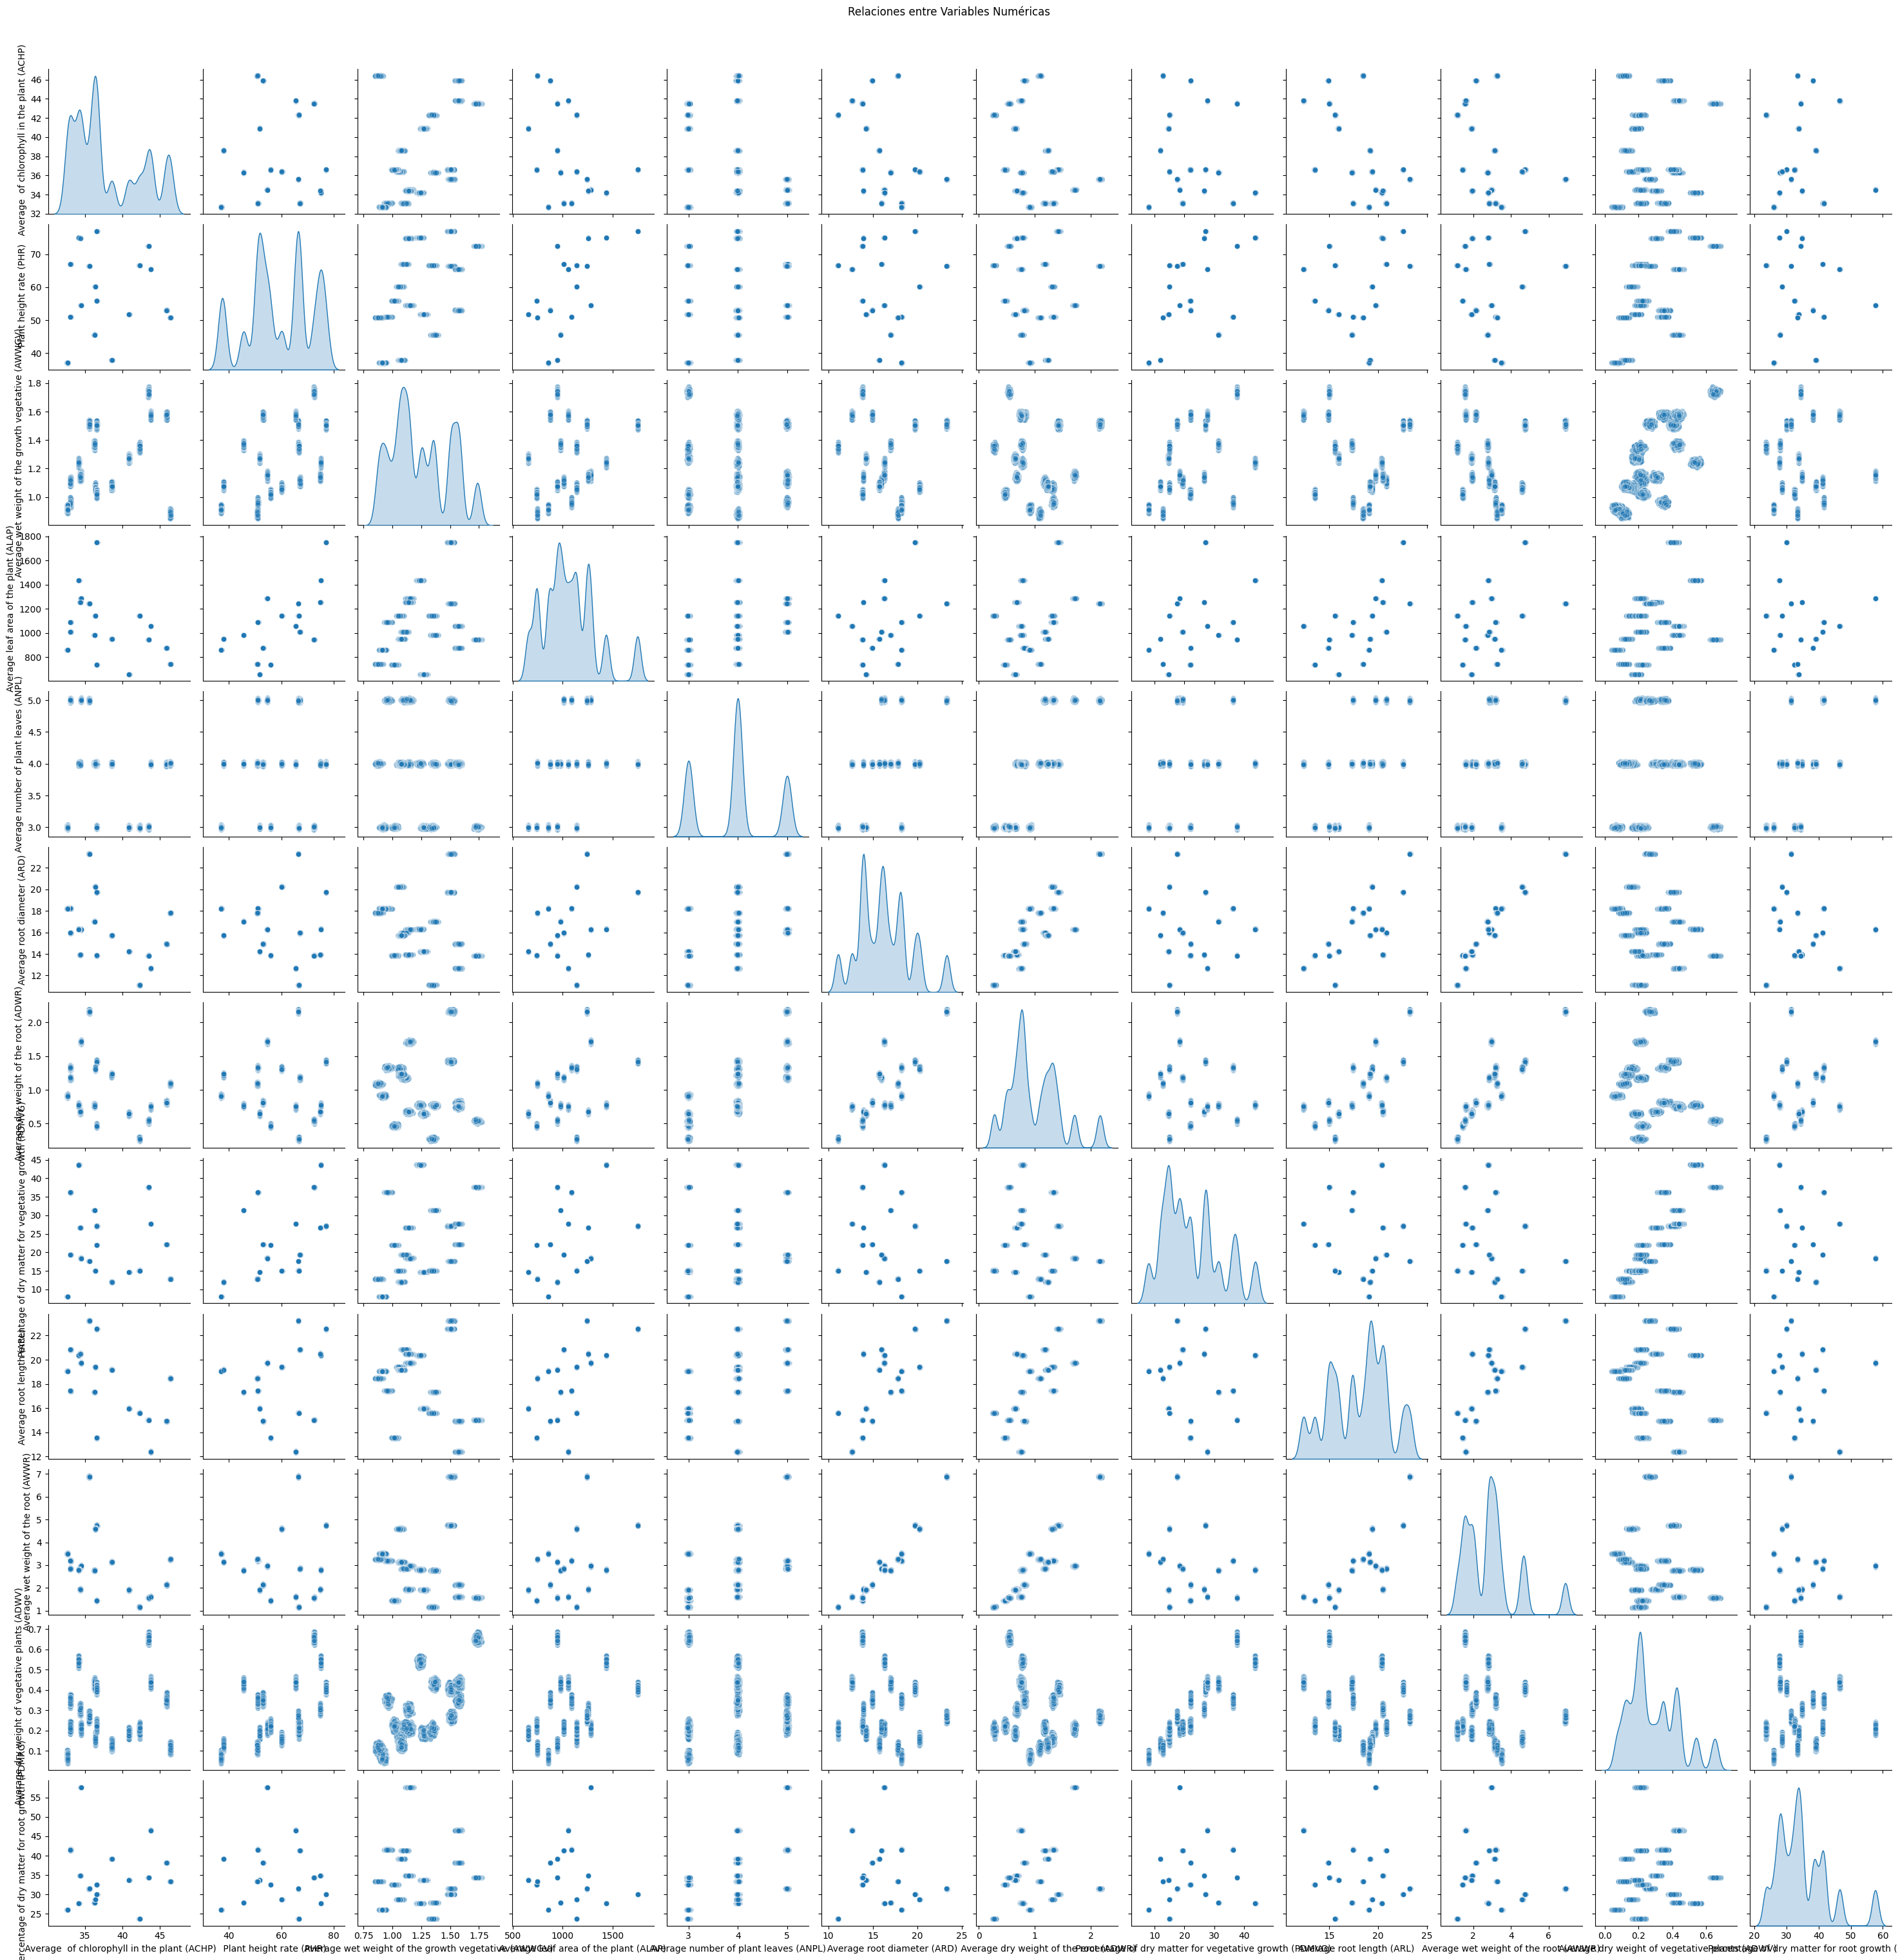

In [4]:
# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(raw_data, diag_kind='kde', plot_kws={'alpha': 0.5})

plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()

<Figure size 1200x1200 with 0 Axes>

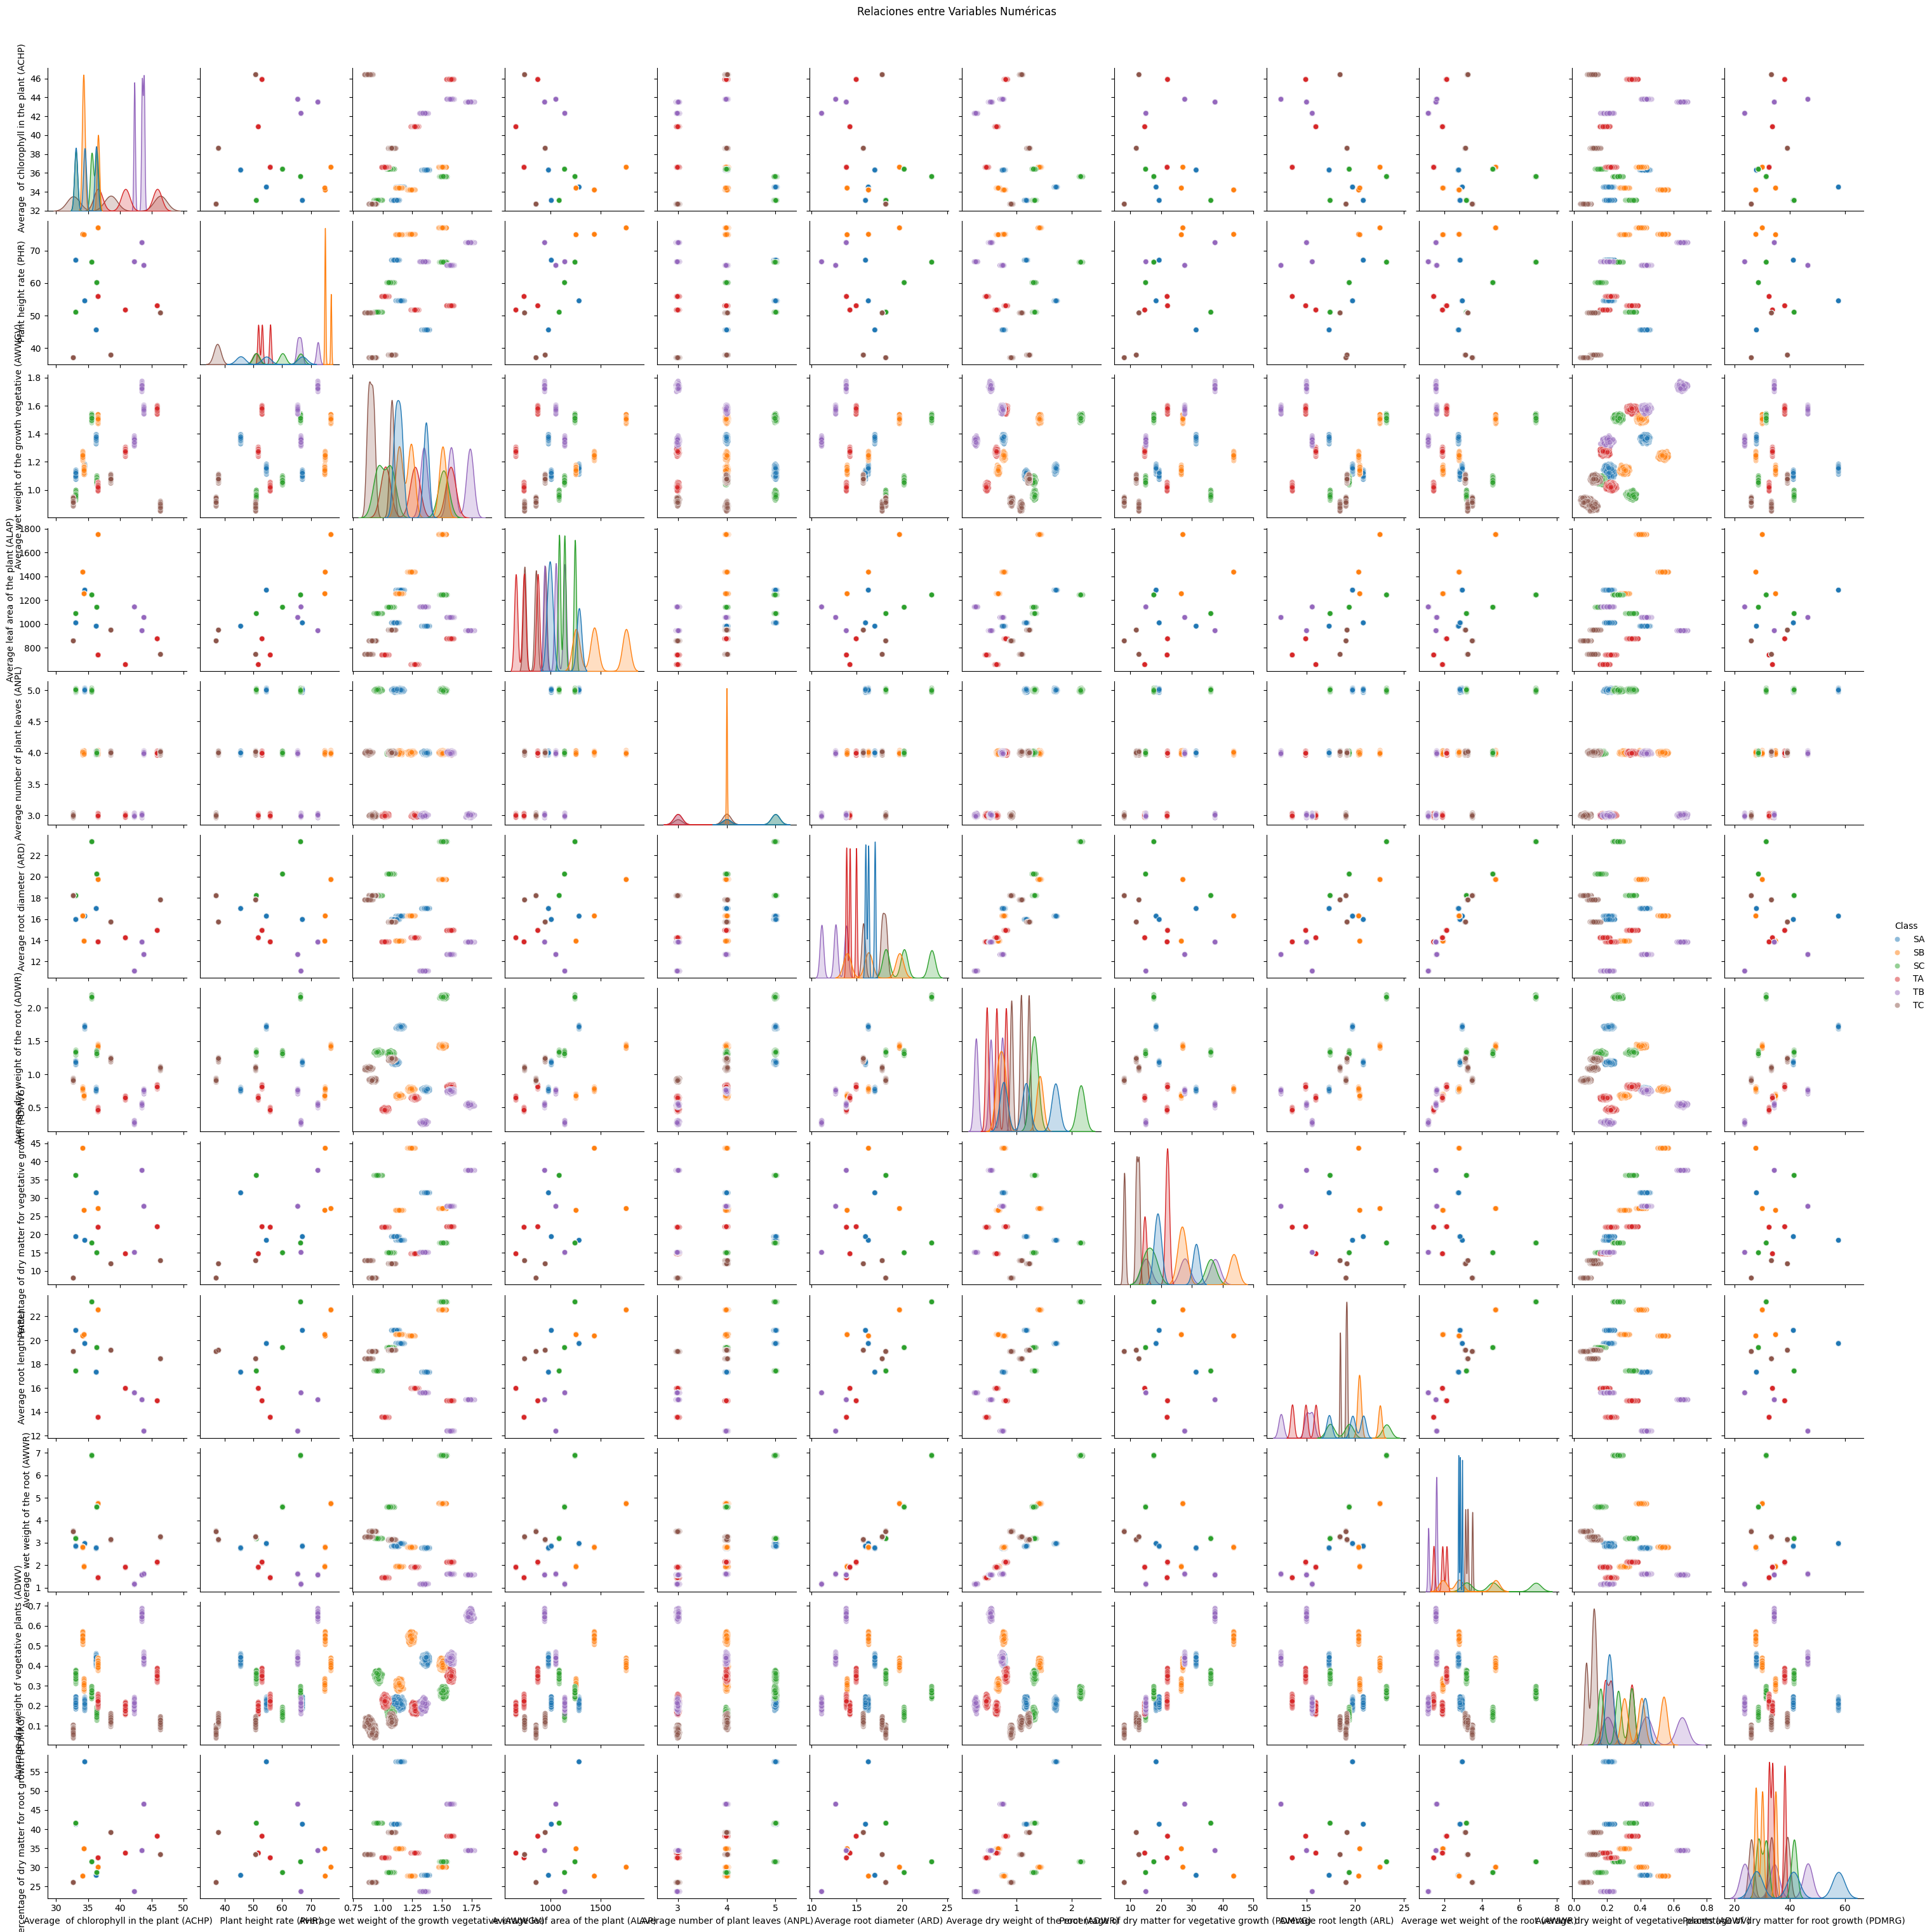

In [5]:
# Crear un gráfico de pares para todas las variables numéricas
plt.figure(figsize=(12, 12))
sns.pairplot(raw_data, diag_kind='kde', plot_kws={'alpha': 0.5}, hue='Class')
plt.suptitle("Relaciones entre Variables Numéricas", y=1.02)
plt.show()

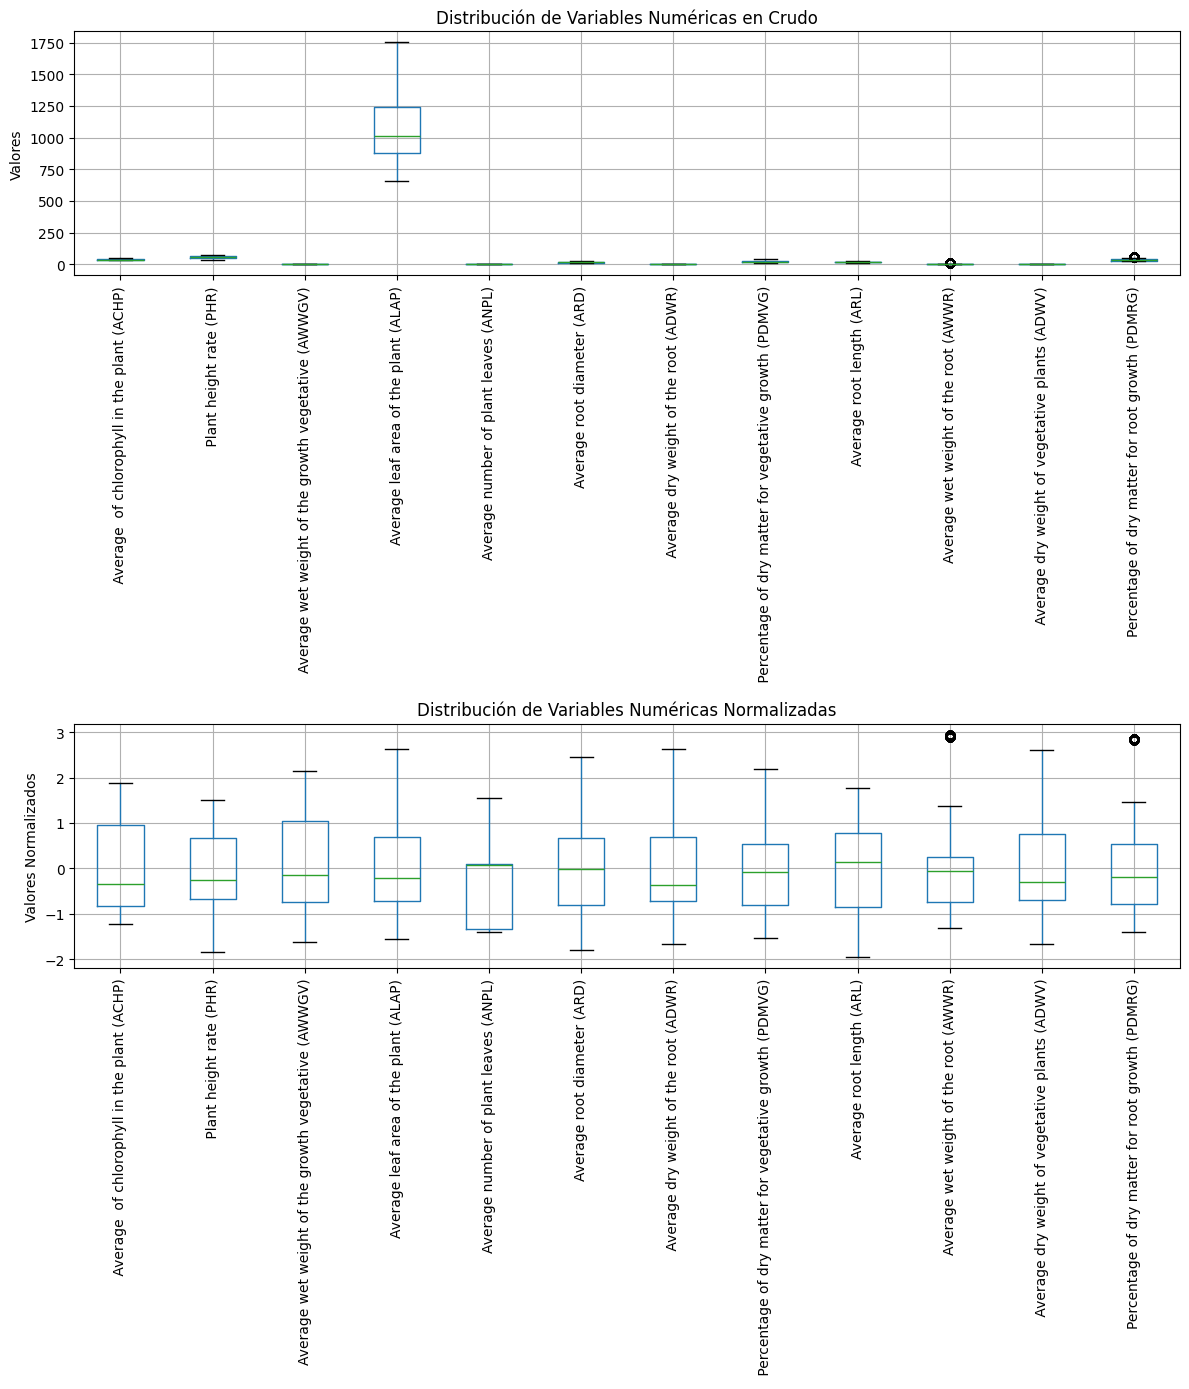

In [6]:
numeric_columns = raw_data.describe().columns  # Seleccionar las columnas numéricas a partir de describe()

# Normalizar los datos
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(raw_data[numeric_columns]), columns=numeric_columns)

# Crear subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

# Gráfico boxplot con datos en crudo
raw_data[numeric_columns].boxplot(ax=axs[0])
axs[0].set_title("Distribución de Variables Numéricas en Crudo")
axs[0].set_xticklabels(numeric_columns, rotation=90)
axs[0].set_ylabel("Valores")
axs[0].grid(True)

# Gráfico boxplot con datos normalizados
data_normalized.boxplot(ax=axs[1])
axs[1].set_title("Distribución de Variables Numéricas Normalizadas")
axs[1].set_xticklabels(numeric_columns, rotation=90)
axs[1].set_ylabel("Valores Normalizados")
axs[1].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

En estas dos gráficas, boxplots, comparan la distribución de nuestras variables numéricas del dataset. El primero de los boxplots muestra las variables numericas en crudo y el segundo las muestra normalizadas. La normalización es útil para hacer que las variables numéricas estén en una escala comparable, especialmente importante si estas variables van a ser usadas en algoritmos de machine learning que son sensibles a las escalas de las características. 

Además, vemos que la mayoría de las varaibles no cuentan con outliers a excepción de 2 de ellas, AWWR y PDMRG.

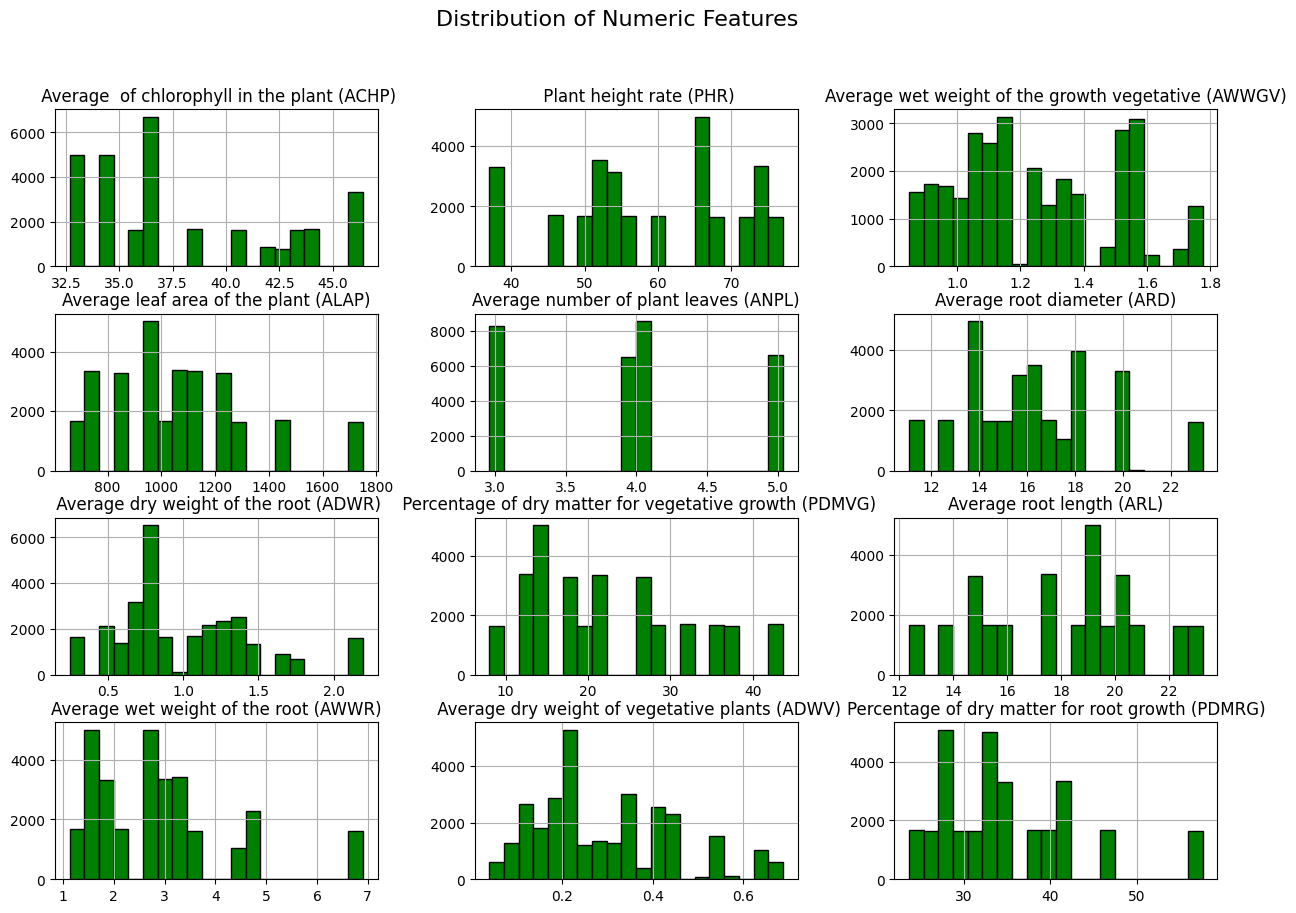

In [7]:
raw_data[numeric_columns].hist(bins=20, figsize=(15, 10), color='Green', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

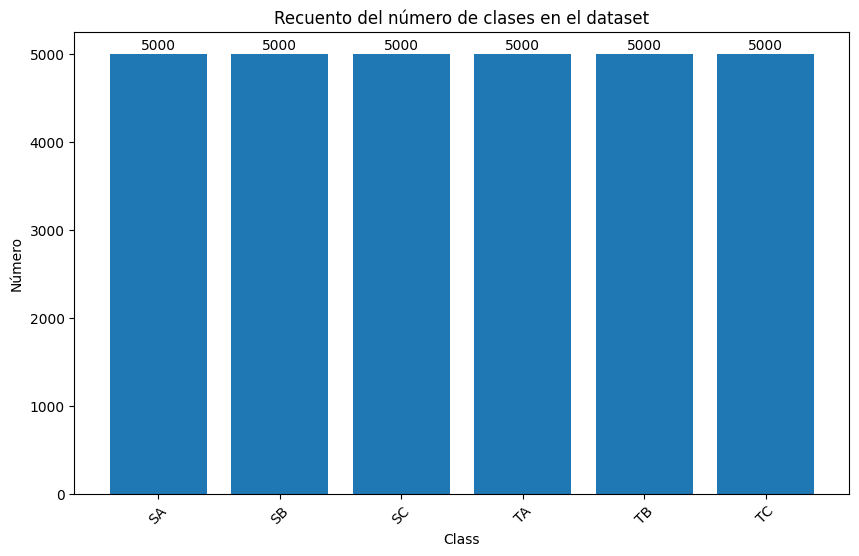

In [8]:
# Contar la cantidad de registros en cada clase
class_counts = raw_data['Class'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values)

# Añadir etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# Etiquetas y título
plt.xlabel("Class")
plt.ylabel("Número")
plt.title("Recuento del número de clases en el dataset")
plt.xticks(rotation=45)
plt.show()


Como se puede apreciar en el gráfico las clases de nuestro dataset están balanceadas, lo que será de gran valor a la hora de realizar modelos de machine learning.

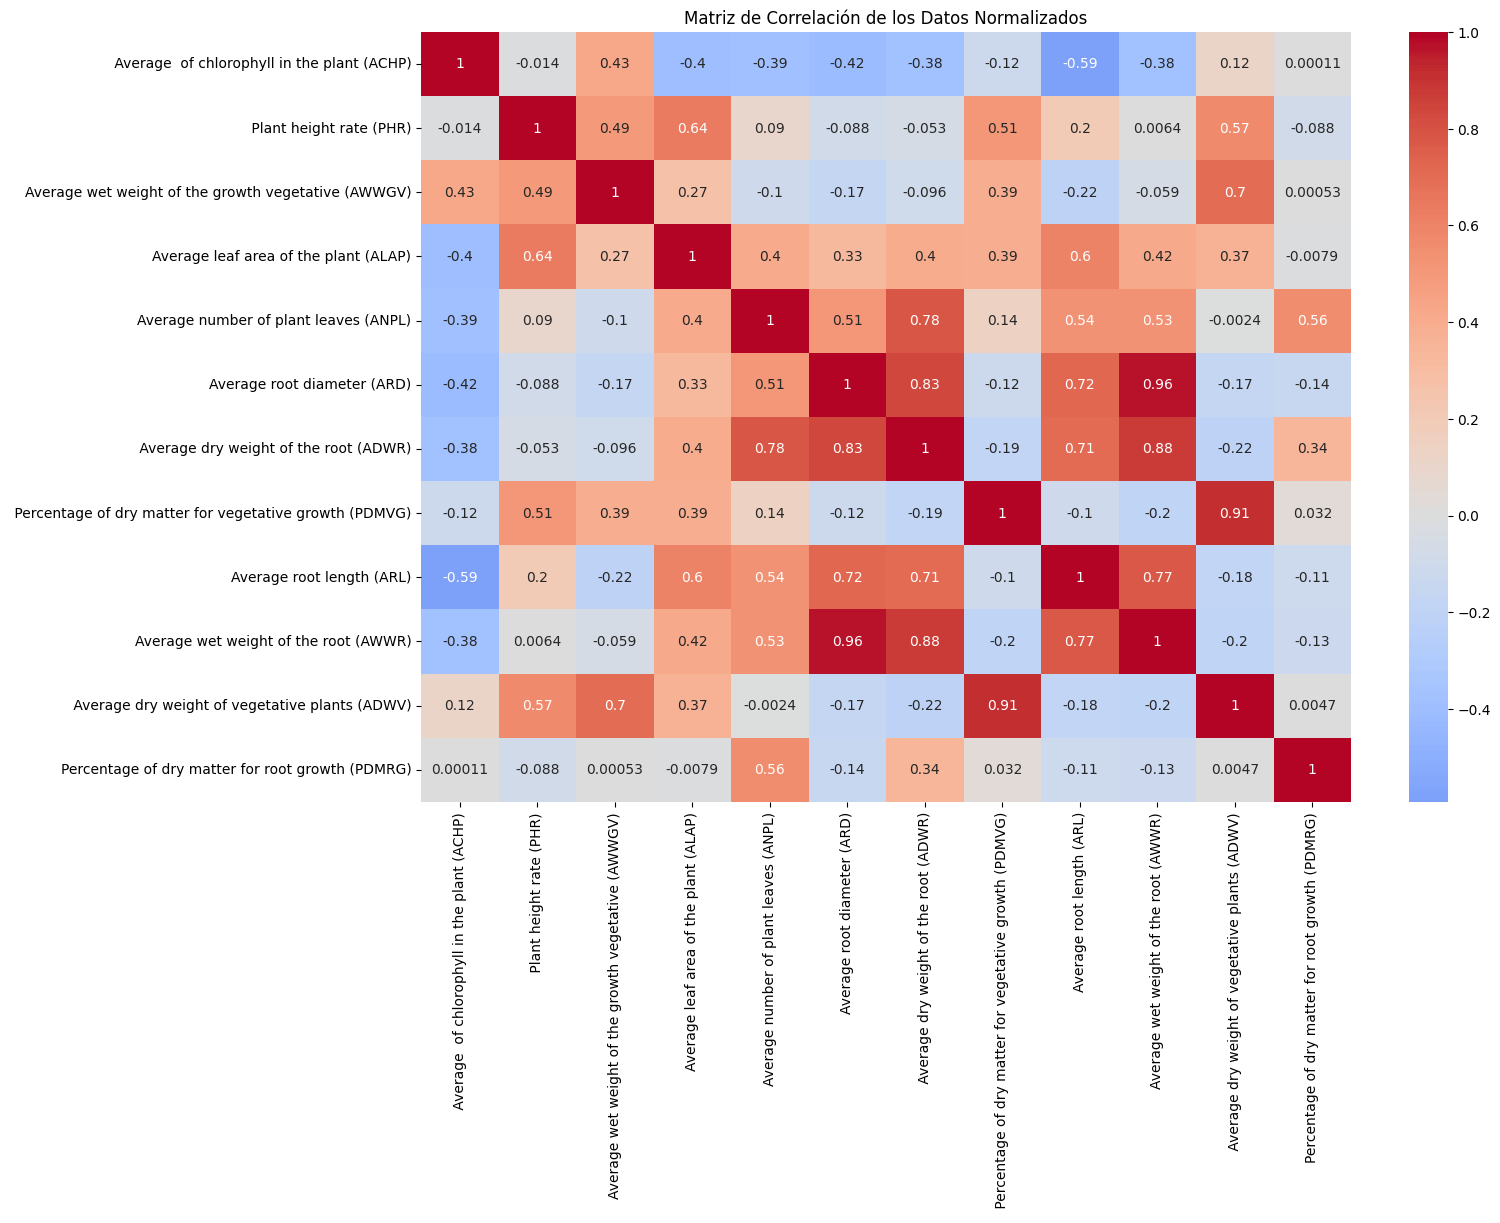

In [9]:
# Filtrar solo las columnas numéricas
numerical_data = raw_data.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos (usando StandardScaler para estandarización)
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()


En esta matriz de correlación vemos que hay bastantes correlaciones entre diferentes variables destacando por ejemplo la alta relación entre el diametro medio de la raíz (Average root diameter, ARD) con el peso medio húmedo de la raíz (Average wet weight of the root, AWWR) del 0.96. Esta última también está altamente relacionada con el peso seco de la raíz del 0.88. A su vez podemos ver como tenemos también una fuerte correlación entre el peso seco vegetal de la planta medio (ADWV) y el porcentaje de materia seca de crecimiento vegetal (PDMVG). 

La multicolinealidad puede ser un problema para algunos modelos, sobretodo los modelos basados en regresión, por ello en el entrenamiento de este tipo (regresión logística) tendremos cuidado y observaremos los resultados con detenimiento. Sin embargo para modelos no basados en regresión, no es ningún problema.

En el siguiente código veremos si hay correlación entre las clases de nuestro dataset, para ello aplicamos one hot encoding, y vemos que no hay relación entre las clases. Las clases de random no las haremos caso, porque luego eliminaremos dicha columna de nuestro dataset.

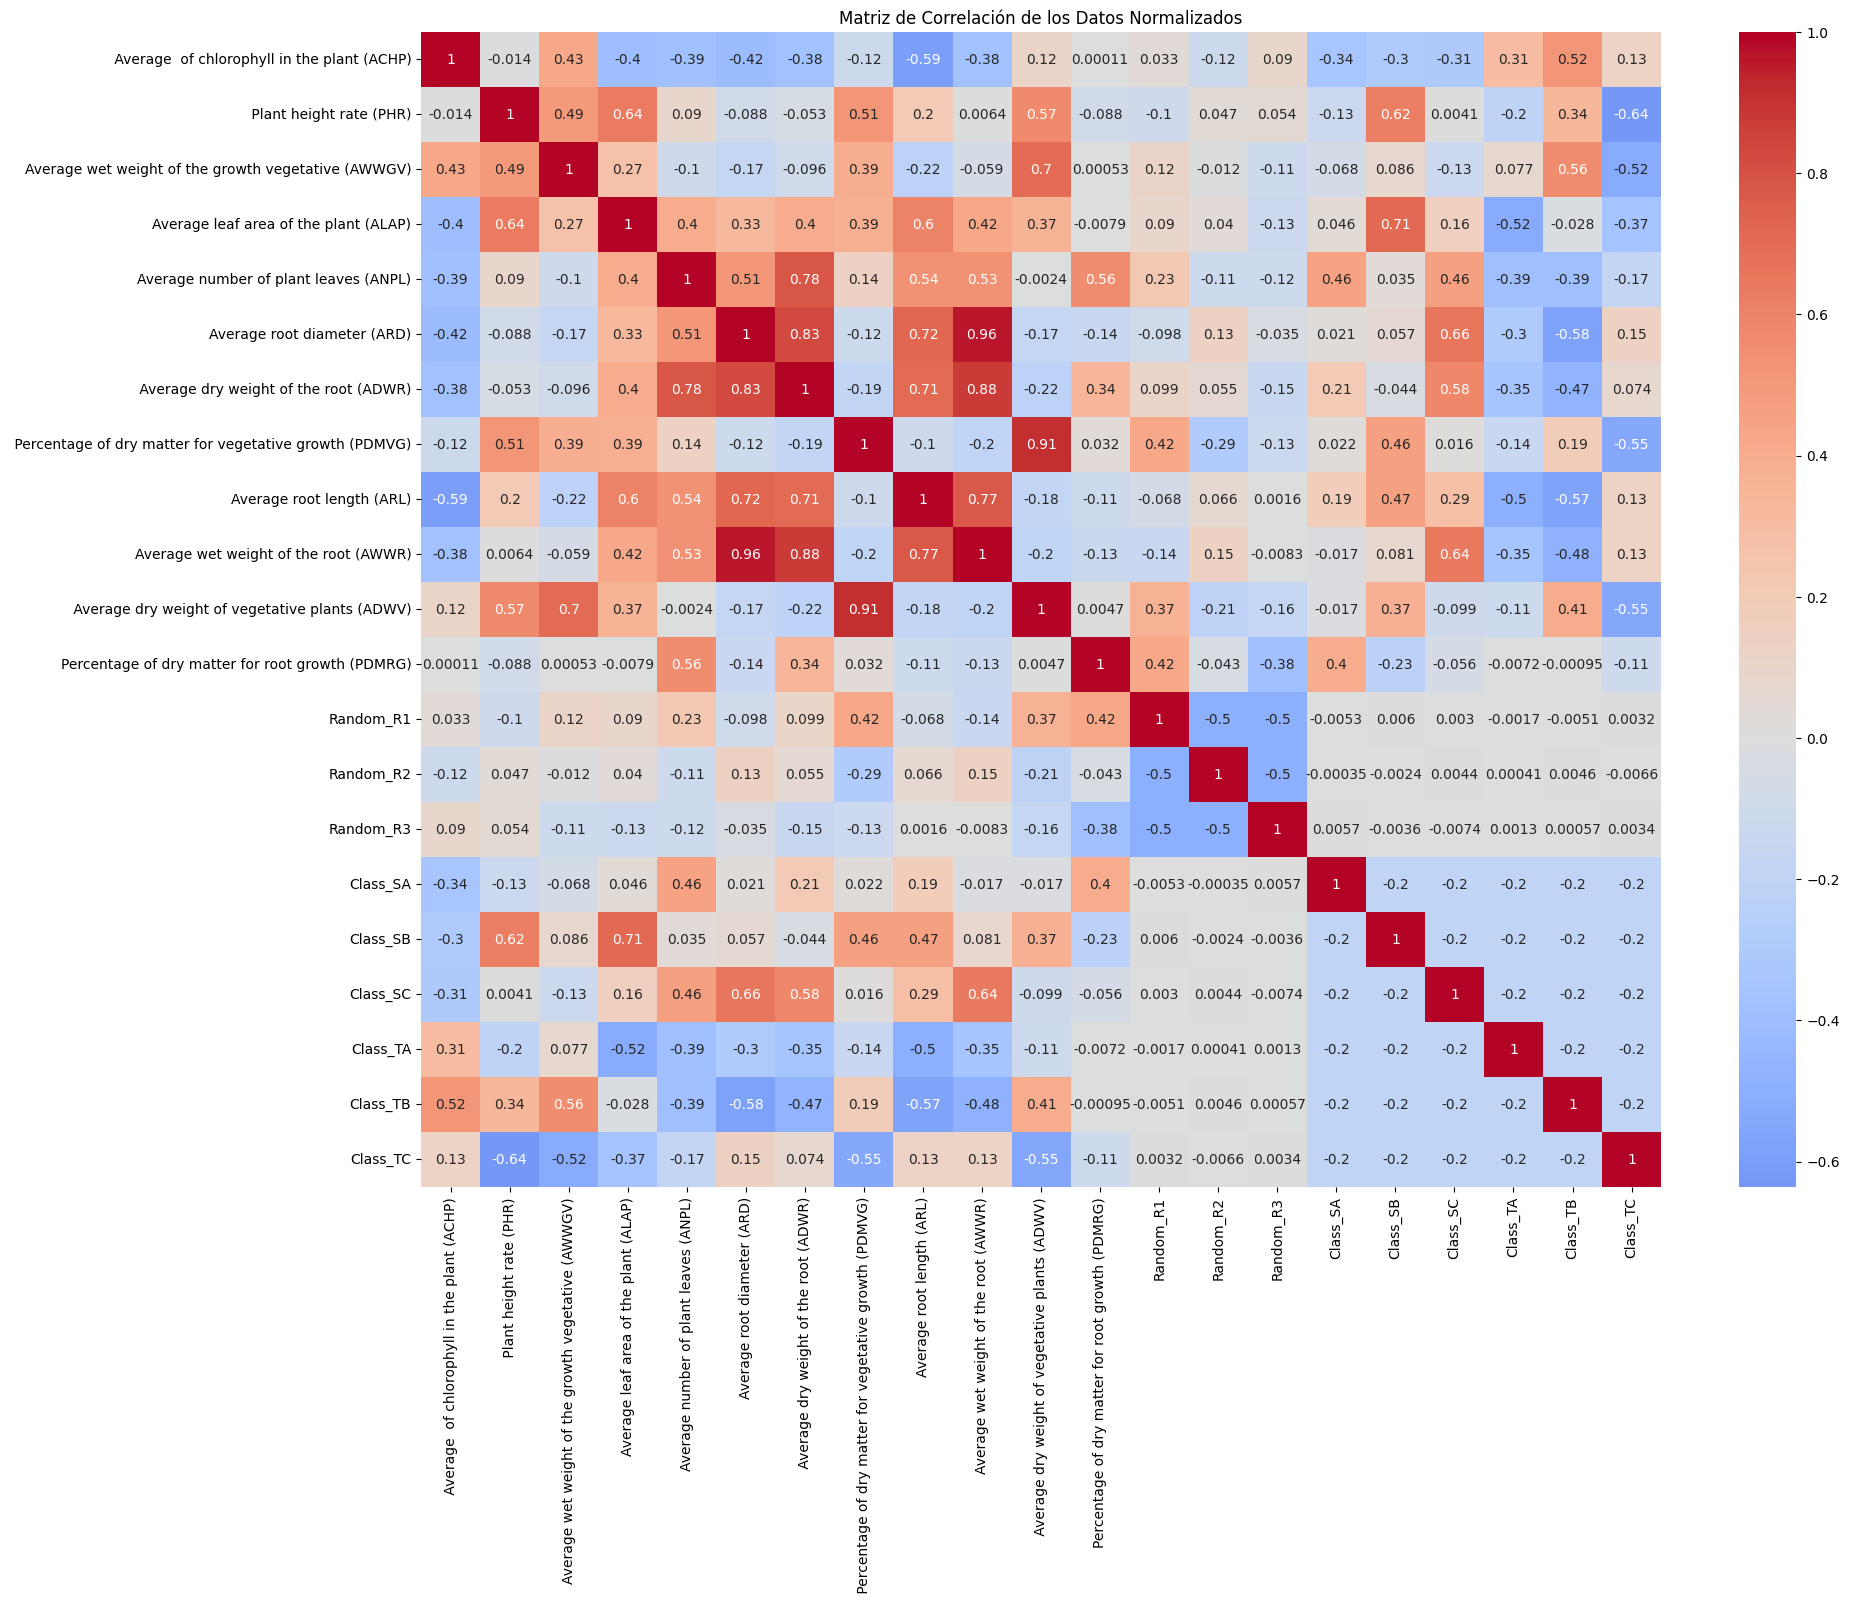

In [10]:
# Aplicar one-hot encoding a las columnas categóricas
encoded_data = pd.get_dummies(raw_data, drop_first=False)  # Codifica las columnas categóricas

# Asegurarse de que todas las columnas sean numéricas (conversión de True/False a 1/0)
encoded_data = encoded_data.astype(float)

# Filtrar solo las columnas numéricas para la normalización
numerical_data = encoded_data.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos usando StandardScaler
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación de los datos normalizados
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()


## Feature Selection

Eliminamos la columna `Random` por no aportar ningún significado a los datos, quedandonos con un dataset de 30.000 filas y 13 columnas (12 features y 1 class). La columna Random es simplemente una selección aleatoria de muestras. 

Conservaremos por el momento todas las demás columnas numéricas. Posteriormente en la sección de [Selección de 2 Features](#selección-de-2-features) se trabajará con unicamente 2 de las columnas del dataset, a parte de la columna clase.

In [11]:
# Elimina la columna 'Random' del DataFrame
raw_data = raw_data.drop(columns=['Random'])
raw_data.shape

(30000, 13)

## Feature Engineering

Algunas de las columnas contienen espacios antes de su nombre, es por ello que decidimos eliminar esos espacios.

In [12]:
# Algunas columnas contienen espacios antes del nombre y puede ser un problema.
raw_data.columns = raw_data.columns.str.strip()
raw_data.columns

Index(['Average  of chlorophyll in the plant (ACHP)',
       'Plant height rate (PHR)',
       'Average wet weight of the growth vegetative (AWWGV)',
       'Average leaf area of the plant (ALAP)',
       'Average number of plant leaves (ANPL)', 'Average root diameter (ARD)',
       'Average dry weight of the root (ADWR)',
       'Percentage of dry matter for vegetative growth (PDMVG)',
       'Average root length (ARL)', 'Average wet weight of the root (AWWR)',
       'Average dry weight of vegetative plants (ADWV)',
       'Percentage of dry matter for root growth (PDMRG)', 'Class'],
      dtype='object')

El dataset no contiene valores NaN, pero por si acaso añadimos esta línea para eliminarlos. Se toma esta política de eliminación al contar con suficientes datos (30.000).

In [13]:
# Elimina todas las filas que contengan cualquier NaN
raw_data = raw_data.dropna()

## PCA:

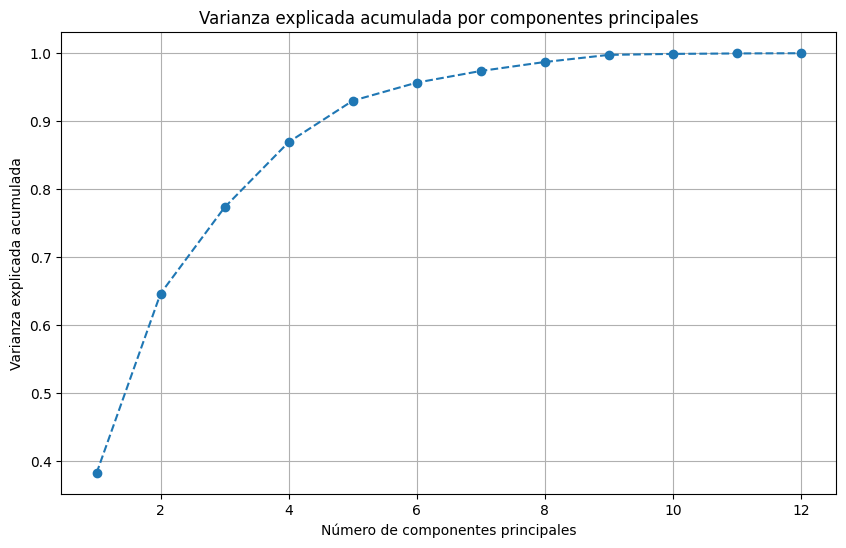

array([3.82465211e-01, 2.64108814e-01, 1.26845297e-01, 9.58667549e-02,
       6.08757288e-02, 2.66313533e-02, 1.71119267e-02, 1.32020865e-02,
       1.04685604e-02, 1.42802222e-03, 6.68889227e-04, 3.27355785e-04])

In [14]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas para PCA
numeric_columns = raw_data.select_dtypes(include=['float64']).columns

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data[numeric_columns])

# Realizar PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Calcular la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

explained_variance_ratio


Cómo se puede ver con estos resultados, más del 90% de la información se conservaría solo con las 5 primeras componenetes principales, por lo que se podría trabajar solo con ellas, resultando así en una reducción de la dimensionalidad importante pasando de 12 a 5 features. No se utilizará esta reducción de dimensionalidad mediante componenetes principales en este trabajo por ser un método en el que se pierde la interpretabilidad de los datos y como se verá más adelante con los datos originales se obtienen buenos resultados.  

En el siguiente código se muestra como sería el nuevo dataset con el que se trabajaría en el caso de usar este método de reducción de la dimensionalidad.

In [15]:
# Reducir los datos a 10 componentes principales
pca_5 = PCA(n_components=5)
reduced_data = pca_5.fit_transform(scaled_data)

# Crear un nuevo DataFrame con los 10 componentes
pca_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(5)])

# Mostrar las primeras filas del nuevo DataFrame
pca_df.head()

PC1       PC2       PC3       PC4       PC5
0  2.128633 -0.345282  2.947080 -0.519761  0.919096
1  2.132367 -0.314597  2.961008 -0.527536  0.903713
2  1.495360 -0.282803  1.023119 -1.058865  0.813890
3  2.129687 -0.315194  2.950275 -0.538917  0.881608
4 -0.458654  0.432596 -0.461103 -0.201229 -1.732315

## División de los datos

Optamos por dividir los datos en 1 set de entrenamiento con el 75% de los datos y un set de test con el 25% de los datos.

In [16]:
X = raw_data.drop('Class', axis=1)
y = raw_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Modelos

Usaremos los siguientes modelos de Machine Learning para predecir las clases de nuestro dataset:
- Modelos Supervisados:
    - Logistic Regression
    - SVM
    - Random Forest
    - Decission Tree
    - K-NN

- Modelos No Supervisados:
    - UMAP
    - Clustering: 
        - K-means
        - Jerárquico


### Modelos Supervisados

#### Logistic Reggresion

La regresión logística es un modelo supervisado utilizado para clasificar datos en categorías, calculando la probabilidad de pertenecer a una clase. Se basa en una combinación lineal de características y utiliza una función sigmoide para producir probabilidades. 

In [17]:
# Crear y entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Definir los hiperparámetros para el tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

# Realizar GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión obtenida:", grid_search.best_score_)

# Entrenar el modelo con los mejores parámetros
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train, y_train)

# Realizar predicciones con el modelo optimizado
y_pred = best_logreg.predict(X_test)

# Calcular la precisión y mostrar el reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy con el modelo optimizado:", accuracy)
print("Classification Report con el modelo optimizado:\n", classification_rep)

Mejores parámetros: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Mejor precisión obtenida: 1.0
Accuracy con el modelo optimizado: 1.0
Classification Report con el modelo optimizado:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



Los resultados obtenidos son buenos, de una precisión del 100%. La multicolinealidad por lo tanto no ha resultado ser un problema. 

A su vez, hemos realizado una busqueda de los mejores resultados mediante param grid. Y nos da como reultado que los mejores parámetros son  `{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}`

Por si acaso en el siguiente modelo aplicaremos regresión logística abordando la multicolinealidad utilizando una penalización Lasso. Esto nos permitirá descartar aquellas variables que no tengan un aporte significativo en nuestro modelo.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report

# Crear y entrenar el modelo de regresión logística con penalización Lasso
logreg_cv = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10, 100],
    cv=5,
    penalty='l1',
    solver='liblinear',
    scoring='accuracy',
    max_iter=1000,
    random_state=42
)

# Entrenar el modelo con validación cruzada
logreg_cv.fit(X_train, y_train)

# Obtener los mejores parámetros (el valor de C)
print("Mejor valor de C (regularización):", logreg_cv.C_[0])

# Realizar predicciones con el modelo optimizado
y_pred = logreg_cv.predict(X_test)

# Calcular la precisión y mostrar el reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy con el modelo optimizado (Lasso):", accuracy)
print("Classification Report con el modelo optimizado (Lasso):\n", classification_rep)

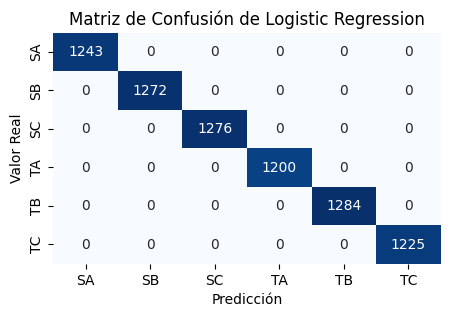

In [18]:
# Calcular la matriz de confusión
matriz_confusion_lr = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_lr, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión de Logistic Regression')
plt.show()

Como prueba de los buenos resultados, la matriz de confusión es perfecta, no ha habido ningún falso positivo ni falso negativo.

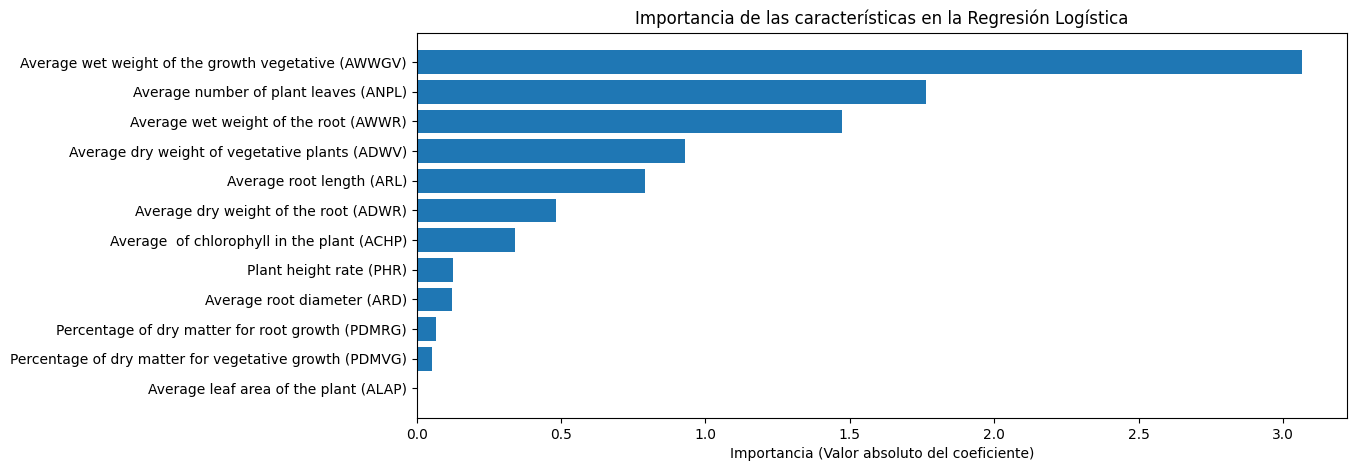

In [ ]:
# Obtener los coeficientes del modelo
coefficients = logreg_cv.coef_[0]

# Crear un DataFrame para mostrar la importancia de las características
importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
}).sort_values(by='Absolute Coefficient', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 5))
plt.barh(importance_lr['Feature'], importance_lr['Absolute Coefficient'])
plt.xlabel('Importancia (Valor absoluto del coeficiente)')
plt.title('Importancia de las características en la Regresión Logística')
plt.gca().invert_yaxis()  # Para que las características más importantes estén arriba
plt.show()


A su vez mostramos aqui las variables más importantes para este modelo, que luego nos servirá para reducir la dimensionalidad de nuestro dataset.

#### SVM

Support Vector Machine (SVM) es un modelo de clasificación que busca el hiperplano óptimo para separar clases, maximizando la distancia entre ellas. Utiliza "support vectors" para definir esta frontera, haciéndolo robusto y eficaz en alta dimensionalidad. Con el "kernel trick", SVM puede separar clases en datos no linealmente separables. Es ideal para problemas de clasificación y es menos sensible a outliers.

In [20]:
# Estandarizar las características (recomendado para SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Exactitud del modelo: 100.00%

Reporte de Clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



Los resultados como se puede observar son bastante buenos con precisión del 100%.

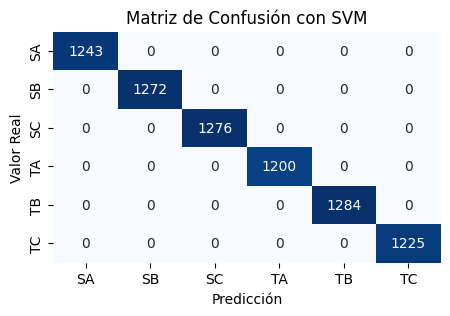

In [21]:
# Calcular la matriz de confusión
matriz_confusion_svm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_svm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con SVM')
plt.show()

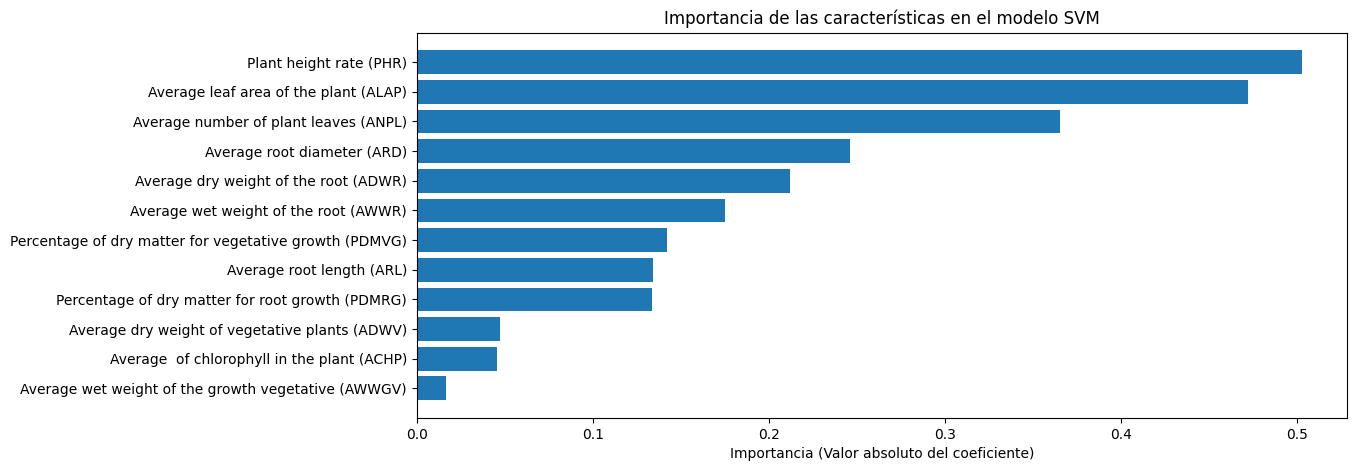

In [22]:
# Obtener los coeficientes del modelo SVM
coefficients = svm_model.coef_[0]

# Crear un DataFrame para mostrar la importancia de las características
importance_svm = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
}).sort_values(by='Absolute Coefficient', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 5))
plt.barh(importance_svm['Feature'], importance_svm['Absolute Coefficient'])
plt.xlabel('Importancia (Valor absoluto del coeficiente)')
plt.title('Importancia de las características en el modelo SVM')
plt.gca().invert_yaxis()  # Para que las características más importantes estén arriba
plt.show()

Estas son las variables más importantes para este modelo, que posteriormente se tendrán en cuenta para la reducción de dimensionalidad.

#### Random Forest

In [23]:
# from sklearn.ensemble import RandomForestClassifier

# # Definir el modelo de Random Forest
# rf_clf = RandomForestClassifier(random_state=42)

# # Definir los hiperparámetros para el tuning
# # param_grid = {
# #     'n_estimators': [50, 100, 200],
# #     'max_depth': [None, 10, 20],
# #     'min_samples_split': [2, 5, 10],
# #     'min_samples_leaf': [1, 2, 4]
# # }

# # Realizar GridSearchCV
# grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Imprimir los mejores parámetros y el mejor score
# print("Mejores parámetros:", grid_search.best_params_)
# print("Mejor precisión obtenida:", grid_search.best_score_)

# # Entrenar el modelo con los mejores parámetros
# best_rf_clf = grid_search.best_estimator_
# best_rf_clf.fit(X_train, y_train)

# # Realizar predicciones con el modelo optimizado
# y_pred = best_rf_clf.predict(X_test)

# # Calcular la precisión y mostrar el reporte de clasificación
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy con el modelo optimizado:", accuracy)
# print("Classification Report con el modelo optimizado:\n", classification_rep)

# # # Graficar la matriz de confusión
# # ConfusionMatrixDisplay.from_estimator(best_rf_clf, X_test, y_test, cmap='Blues')
# # plt.title('Matriz de Confusión del Modelo Optimizado de Random Forest')
# # plt.show()

Hemos comentado el anterior código por demorar mucho (9 minutos). Pero de él hemos obtenido los paramentros ideales para el random forest que se pueden observar en el siguiente código.

In [24]:
# Definir el modelo de Random Forest con parámetros específicos
rf_clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
rf_clf.fit(X_train, y_train)

# Realizar predicciones con el modelo
y_pred = rf_clf.predict(X_test)

# Calcular la precisión y mostrar el reporte de clasificación
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy del modelo:", accuracy)
print("Classification Report del modelo:\n", classification_rep)

Accuracy del modelo: 1.0
Classification Report del modelo:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



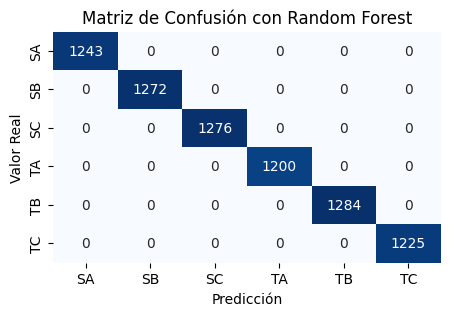

In [25]:
# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_svm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Random Forest')
plt.show()

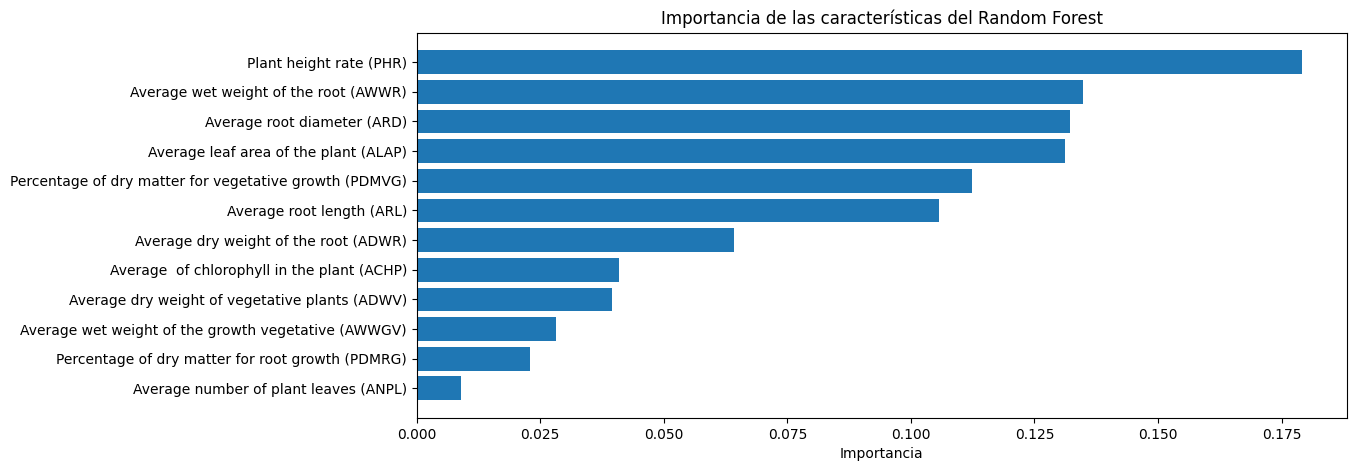

In [26]:

# Mostrar la importancia de las características
feature_importances = rf_clf.feature_importances_
importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Imprimir la importancia de las características
#print("Importancia de las características:\n", importance_df)

# Graficar la importancia de las características
plt.figure(figsize=(12, 5))
plt.barh(importance_rf['Feature'], importance_rf['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de las características del Random Forest')
plt.gca().invert_yaxis()  # Para que las características más importantes estén arriba
plt.show()

#### Decission Tree

In [27]:
# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = modelo_arbol.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:\n", reporte)

Exactitud del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



Al igual que los 2 anteriores modelos, la precisión es del 100%.

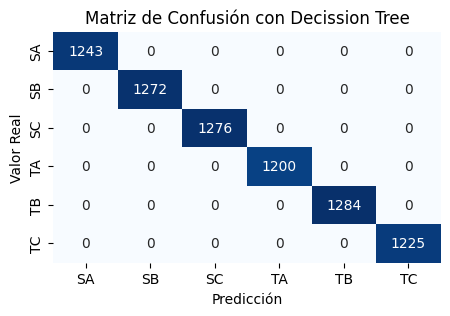

In [28]:
# Obtener predicciones (interpretadas como valores enteros si las clases son numéricas)
y_pred = modelo_arbol.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion_dt = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Decission Tree')
plt.show()

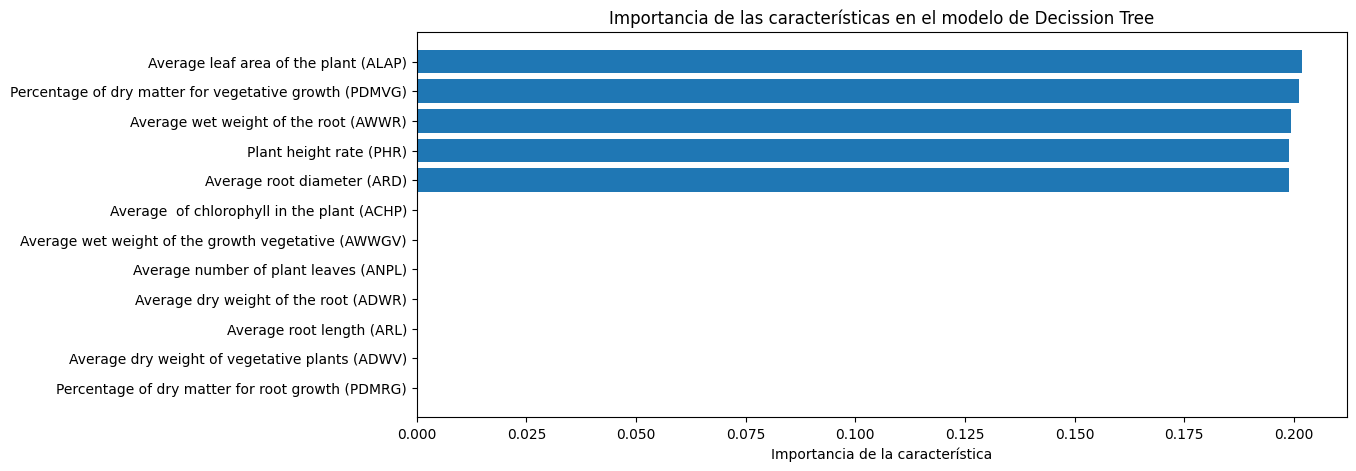

In [29]:
# Obtener la importancia de las características
importancias = modelo_arbol.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 5))
plt.barh(importance_dt['Feature'], importance_dt['Importance'])
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en el modelo de Decission Tree')
plt.gca().invert_yaxis()  # Para que las características más importantes estén arriba
plt.show()

En el gráfico se pueden observar cuales son las variables más importantes, en este caso también se pueden ver en el mismo árbol, ya que son las que se utilizan para tomar cada una de las decisiones. Que esté una por encima de las otras no tiene mucha importancia en este tipo de modelo. únicamente representa que gracias a esa variable se han separado más datos, pero esto está influenciado por el spliting aleatorio de la separación entre entrenamiento y testeo.

En la siguiente ilustración del árbol de decisión se puede ver de forma clara cual es el proceso que toma el árbol para tomar cada una de las decisiones.

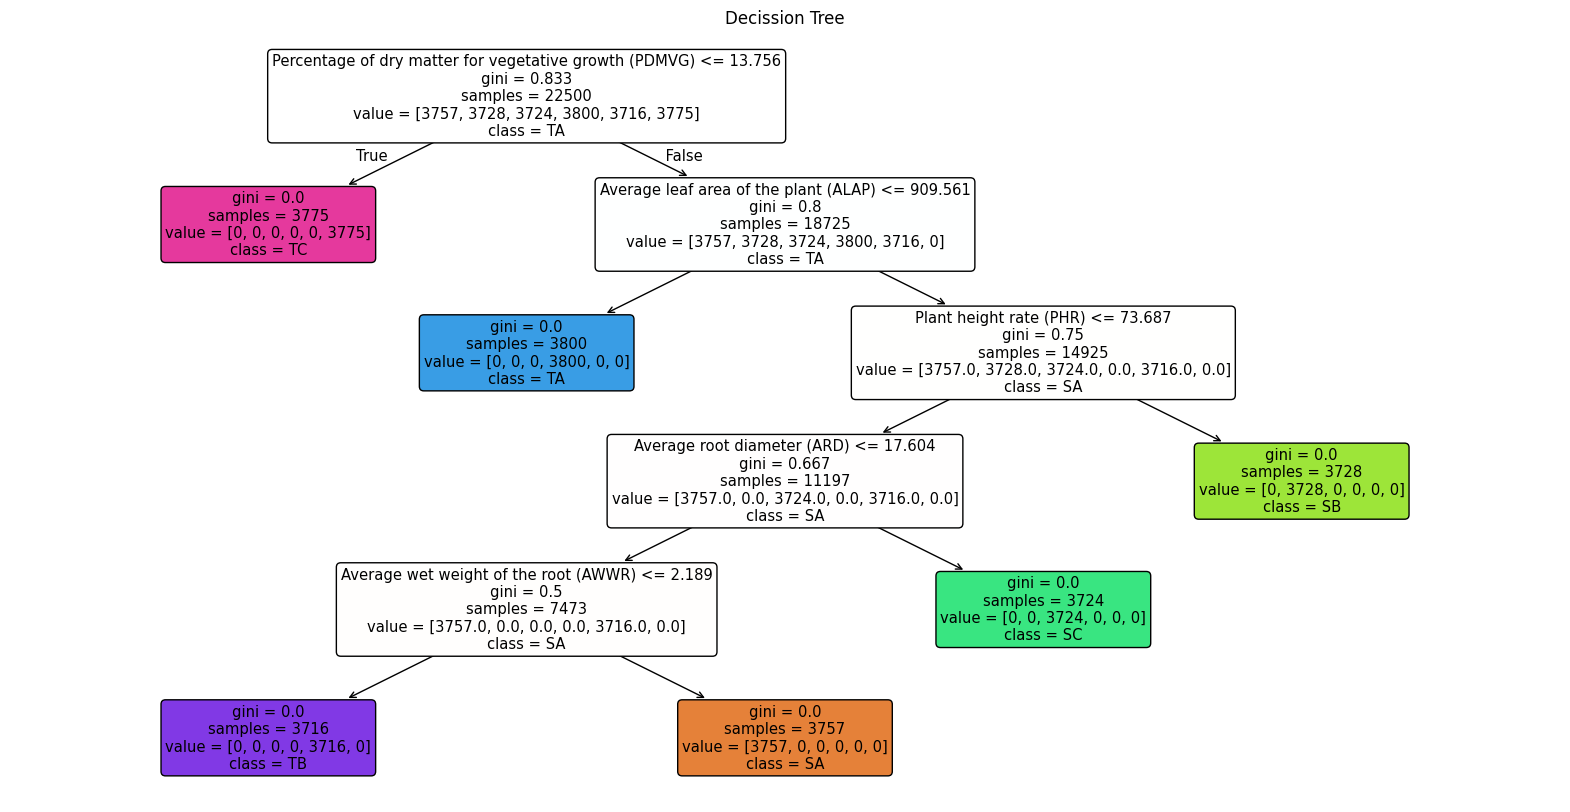

In [30]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, filled=True, rounded=True, feature_names=list(X_train.columns), class_names=list(modelo_arbol.classes_))
plt.title("Decission Tree")
plt.show()


A su vez, hemos querido enriquecer un poco más este proceso de forma gráfica y hemos representado como sería la toma de decisión teniendo en cuenta las otras clases en el contexto de cada una de las variables en donde se toma cada una de las decisiones con el siguiente gráfico.

La sección en verde representa la selección de dichos datos de dicha clase y su posterior eliminación del conjunto de futuras decisiones.

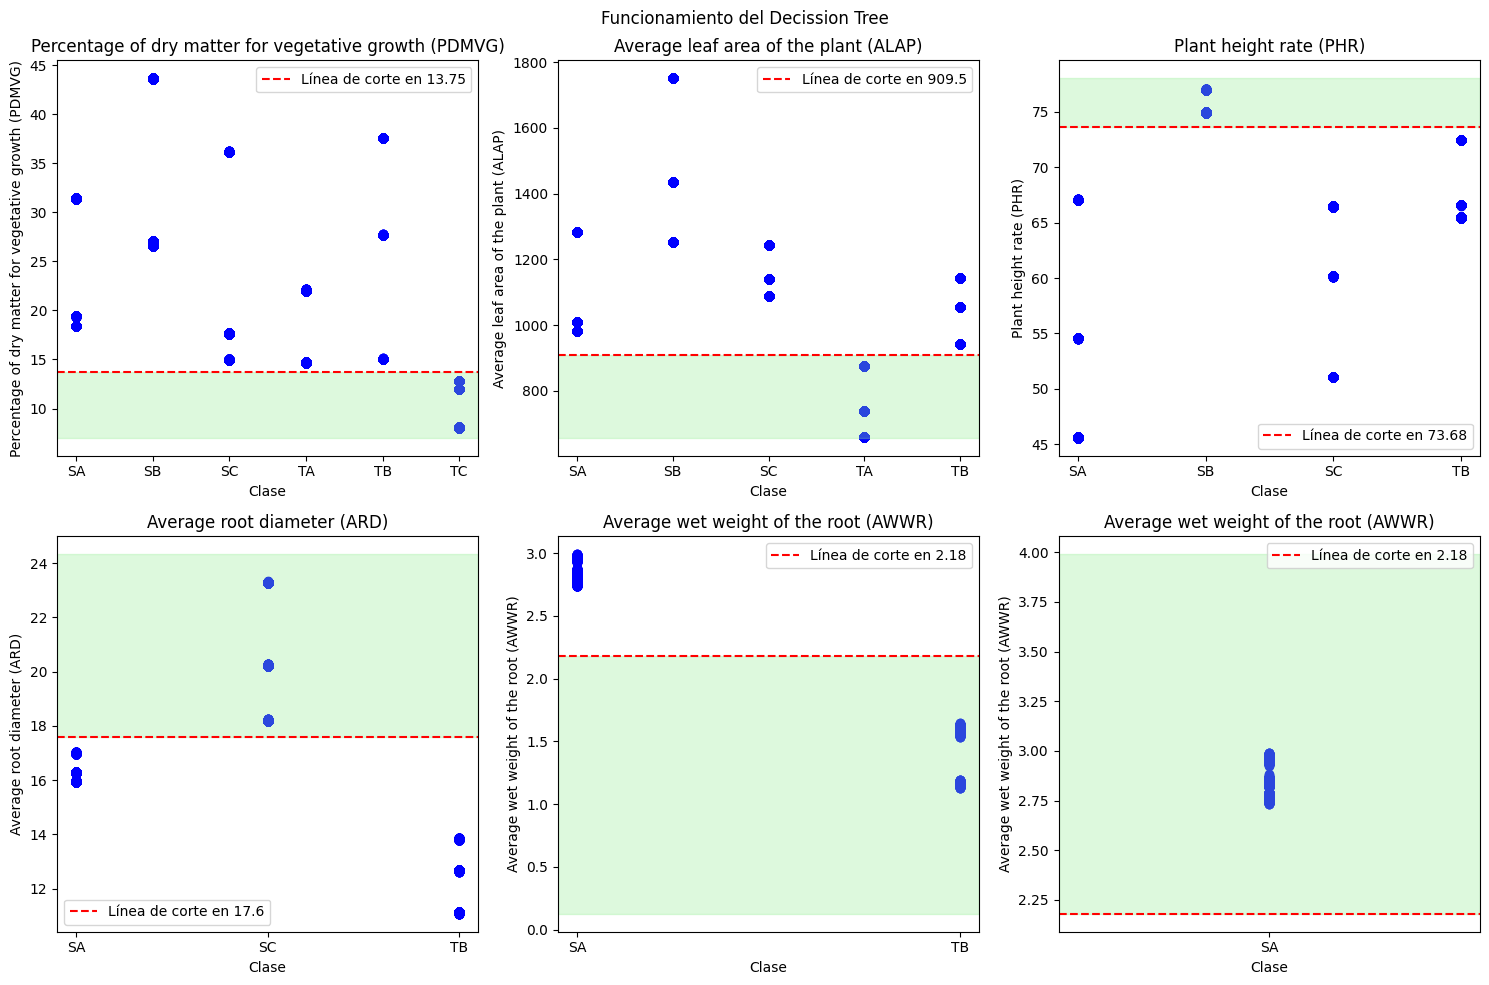

In [31]:
# Crear la figura y los subplots 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Definir las clases y las columnas de interés junto con los valores de corte
clases = ['TC', 'TA', 'SB', 'SC', 'TB', 'SA']
columnas = [
    'Percentage of dry matter for vegetative growth (PDMVG)',
    'Average leaf area of the plant (ALAP)',
    'Plant height rate (PHR)',
    'Average root diameter (ARD)',
    'Average wet weight of the root (AWWR)',
    'Average wet weight of the root (AWWR)'
]
lineas_de_corte = [13.75, 909.5, 73.68, 17.6, 2.18, 2.18]
color_above = [False, False, True, True, False, True]  # True para colorear por encima, False para por debajo


# Crear los scatter plots en cada subplot
for i, ax in enumerate(axs.flat):
    # Filtrar los datos eliminando clases progresivamente
    filtered_data = raw_data[~raw_data['Class'].isin(clases[:i])]
    
    # Scatter plot para la variable correspondiente y datos filtrados
    ax.scatter(filtered_data['Class'], filtered_data[columnas[i]], color='b')
    
    # Línea de corte específica para cada subplot
    corte = lineas_de_corte[i]
    ax.axhline(y=corte, color='r', linestyle='--', label=f'Línea de corte en {corte}')

    # Relleno completo en el fondo del gráfico
    if color_above[i]:  # Colorear por encima de la línea de corte
        ax.axhspan(corte, (filtered_data[columnas[i]].max()+1), color='lightgreen', alpha=0.3)
    else:  # Colorear por debajo de la línea de corte
        ax.axhspan((filtered_data[columnas[i]].min()-1), corte, color='lightgreen', alpha=0.3)

    # Personalización del subplot
    ax.set_xlabel('Clase')
    ax.set_ylabel(columnas[i])
    ax.set_title(f'{columnas[i]}')
    ax.legend()

# Ajustar el layout para evitar superposición de etiquetas
plt.suptitle("Funcionamiento del Decission Tree")
plt.tight_layout()
plt.show()


Después de ver estos resultados, se podría hacer una reducción de la dimensionalidad del dataset dejando solo las 5 variables que usa decission tree para la clasificación de las plantas. Estas variables sería: 'Percentage of dry matter for vegetative growth (PDMVG)', 'Average leaf area of the plant (ALAP)', 'Plant height rate (PHR)', 'Average root diameter (ARD)', 'Average wet weight of the root (AWWR)' y 'Average wet weight of the root (AWWR)'. Incluso, viendo el anterior proceso del árbol de decisión en la etapa de 'Average root diameter (ARD)', añadiendo otro corte al gráfico se podría clasificar igualemente los grupos restantes. Por lo que se podría reducir el dataset incluso a unicamente 4 variables. 

#### K-NN

In [32]:
# Dividir el conjunto de datos con solo las columnas numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalar las características para mejorar el rendimiento de KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo KNN
knn = KNeighborsClassifier(n_neighbors=6)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



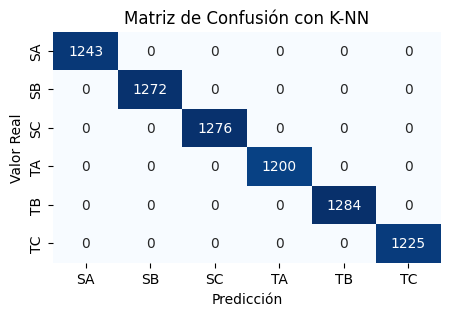

In [33]:
# Visualizar la matriz de confusión
matriz_confusion_knn = confusion_matrix(y_test, y_pred)
class_labels = sorted(set(y))
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_knn, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con K-NN')
plt.show()

A diferencia de modelos como SVM, regresión logística o árboles de decisión, el modelo K-Nearest Neighbors (KNN) no tiene coeficientes o importancias de características intrínsecas, ya que la predicción se basa en la proximidad a los vecinos más cercanos en lugar de un conjunto de pesos asociados a las características. 

Aplicamos un enfoque diferente utilizando PCA para evitar multicolinealidad en el que algunas veces puede ser un problema para KNN, y seguimos obteniendo buenos resultados.

In [34]:
# Aplicar PCA para reducir la multicolinealidad
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Definir y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_pca, y_train)

# Predecir y evaluar el modelo
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



#### Resumen y conclusiones de los modelos supervisados:

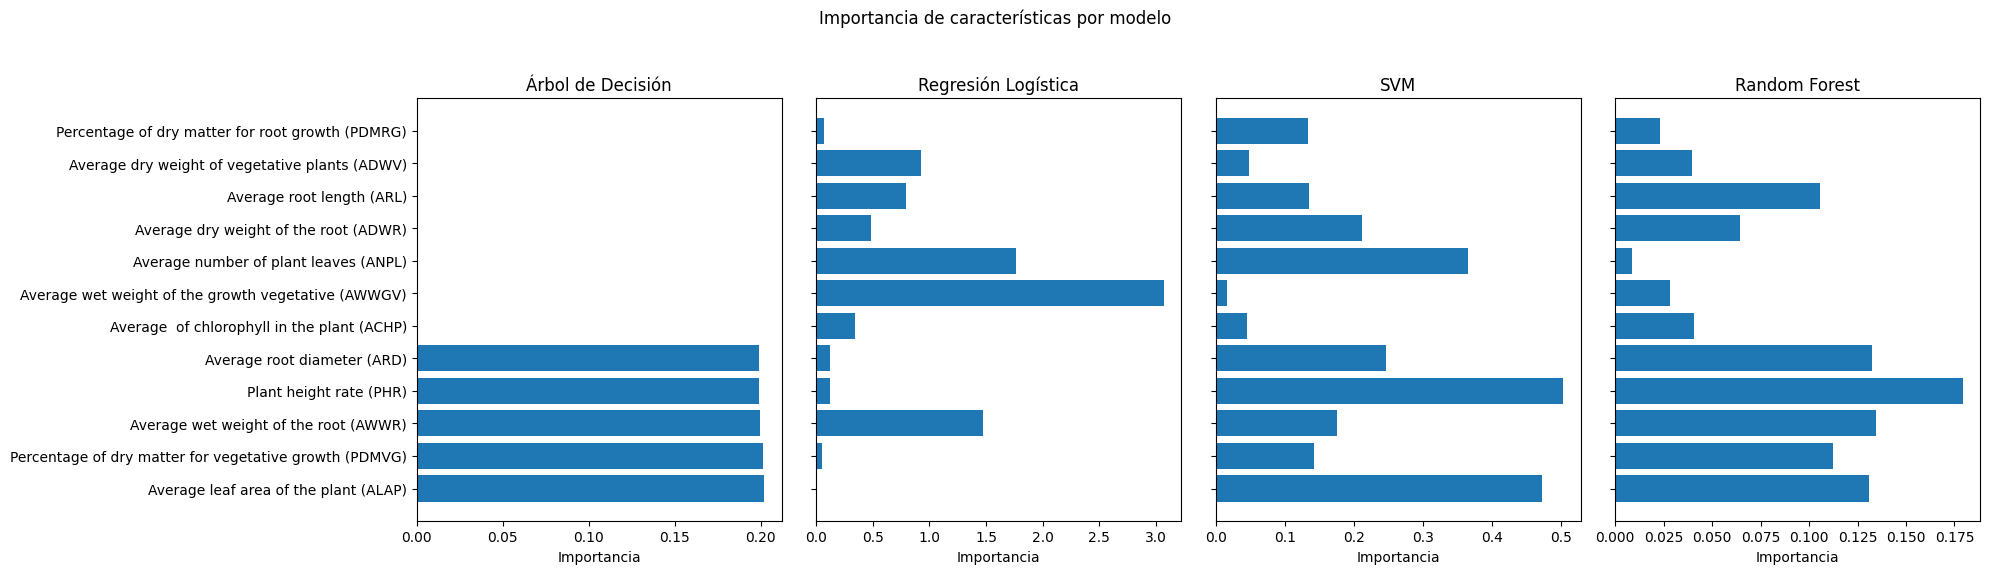

In [35]:
# Lista de DataFrames de importancia y títulos correspondientes
importances = [importance_dt, importance_lr, importance_svm, importance_rf]
titles = [
    'Árbol de Decisión',
    'Regresión Logística',
    'SVM',
    'Random Forest'
]

# Crear subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)
fig.suptitle("Importancia de características por modelo")

# Recorrer cada DataFrame de importancia y mostrar en un subplot
for ax, importance_df, title in zip(axes, importances, titles):
    # Verificar el nombre de la columna de importancia
    importance_column = 'Absolute Coefficient' if 'Absolute Coefficient' in importance_df.columns else 'Importance'
    
    ax.barh(importance_df['Feature'], importance_df[importance_column])
    ax.set_title(title)
    ax.invert_yaxis()  # Para que las características más importantes estén arriba
    ax.set_xlabel('Importancia')

# Ajustar el diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dependiendo del modelo, hay variabilidad de resultados en cuanto a cuales son las caracterísitcas más importantes del dataset. Aunque podemos generalizar y ver algunas que destacan sobre el resto. Una de ellas es `Plant height rate (PHR)`, dicha característica es la más importante en 3 de los modelos. La segunda característica más importante podría ser `Average leaf area of the plant (ALAP)`. Otra característica buena es `Average wet weight of the root (AWWR)`.

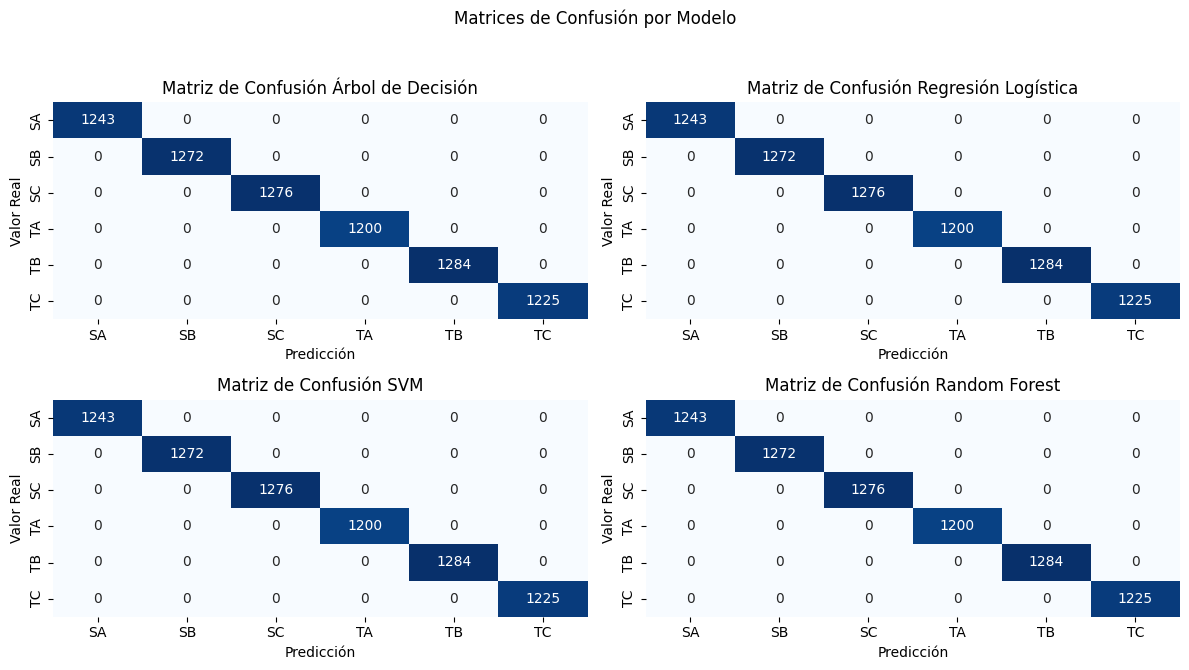

In [36]:
# Lista de matrices de confusión y títulos correspondientes
confusion_matrices = [matriz_confusion_dt, matriz_confusion_lr, matriz_confusion_svm, matriz_confusion_rf]
titles = [
    'Matriz de Confusión Árbol de Decisión',
    'Matriz de Confusión Regresión Logística',
    'Matriz de Confusión SVM',
    'Matriz de Confusión Random Forest'
]

# Etiquetas de las clases
class_labels = sorted(set(y))

# Crear subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle("Matrices de Confusión por Modelo")

# Graficar cada matriz de confusión en un subplot
for ax, matrix, title in zip(axes.flat, confusion_matrices, titles):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor Real')

# Ajustar el diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

En general, todos los modelos están dando muy buenos resultados en clasificación. Estos modelos están usando todas las características, es por ello que para mejorar el problema vamos a intentar aplicar una reducción de dimensionalidad en el apartado: [Selección de 2 Features](#selección-de-2-features).

### Modelos No Supervisados

A través de los modelos no supervisados intentaresmos agrupar las características de nuestro dataset en diferentes clusters. En un principio en clusters de 6, ya que son las clases que tenemos, para ver si hay patrones que agrupen características de diferentes clases y con ello veremos si puede exisitir cierta relación entre clases.

#### UMAP

UMAP (Uniform Manifold Approximation and Projection) es una técnica de reducción de dimensionalidad utilizada para proyectar datos de alta dimensión en un espacio de menor dimensión (generalmente 2D o 3D) preservando la estructura local y global de los datos originales.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


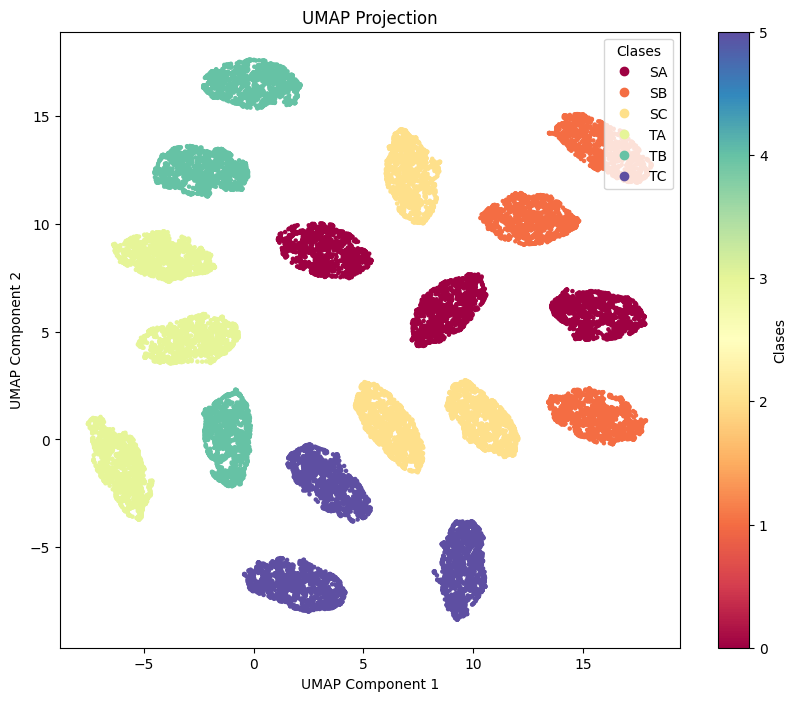

array([[15.6298   ,  6.2124405],
       [16.026129 ,  5.7482014],
       [ 7.4277215,  4.8803644],
       [17.046913 ,  6.5816383],
       [ 2.625873 ,  8.738351 ]], dtype=float32)

In [37]:
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Configura UMAP
reducer = umap.UMAP(n_neighbors=6, min_dist=0.1, n_components=2, random_state=42)

# Ajustar UMAP a los datos
embedding = reducer.fit_transform(data_scaled)

# Convertir etiquetas de texto a números para hacer el gráfico
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Obtener las etiquetas de clase
classes = label_encoder.classes_

# Crear el gráfico con leyenda
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    embedding[:, 0], embedding[:, 1], c=y_numeric, cmap='Spectral', s=5
)
plt.colorbar(label='Clases')  # Agrega la barra de color con el nombre de clases
plt.title('UMAP Projection')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Crear leyenda personalizada para clases
handles, _ = scatter.legend_elements(prop="colors")
legend_labels = [f"{classes[i]}" for i in range(len(classes))]
plt.legend(handles, legend_labels, title="Clases", loc="upper right")

plt.show()

embedding[0:5]

Se puede observar como las clases pertenecientes al grupo "S" están en una región y las clases del grupo "T" están en otra diferenciada. Hay patrones muy bien demarcados, pero dentro de las grupos de clases "T" y "S" están entremezclados, exceptuando la clase "TC" la cual está agrupada.

#### Clustering

##### Jerarquico

Estamos trabajando con un dataset de plantas. En el mundo de la biología es ampliamente conocido el uso de los dendrogramas para agrupar especies por rasgos o características, dando lugar al campo de la taxonomía. En esta parte del trabajo eliminaremos la columna "Class" e intentaremos clustrizar los datos en grupos de 6 para ver si mediante entrenamiento no supervisado se puede llegar a las clases originales del dataset. Si no se consiguiera obtener los resultados de las clases de manera perfecta, este método también sería útil en la biología para poder catalogar familias de plantas mediante sus características.

En esta sección de clustering jerárquico hemos optado por usar el método de "ward" en la construcción del dendrograma porque es el que produce una visualización más limpia y estructurada. El método de Ward minimiza la varianza dentro de cada cluster en cada etapa, generando agrupaciones compactas y homogéneas. Esto resulta en un dendrograma donde las distancias entre clusters están mejor representadas, facilitando la interpretación visual de la estructura jerárquica de los datos.

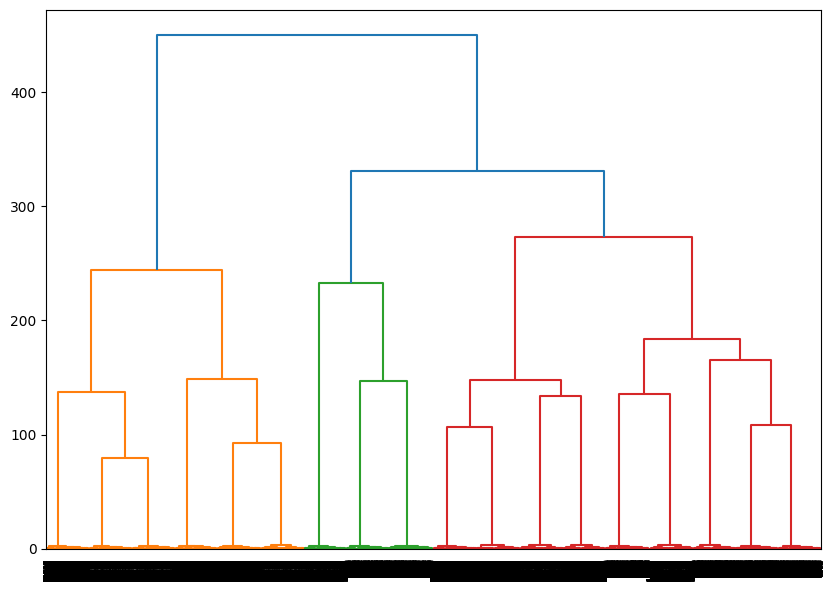

In [38]:
X_numerico_cluster = X.select_dtypes(include=['number'])

# Supongamos que tu dataset es 'df'
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)  # Escalamiento

# Clustering jerárquico usando Ward
Z = linkage(df_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()

# Dividir en clusters
clusters = fcluster(Z, 6, criterion='maxclust')
df_con_clusters = raw_data.copy()
df_con_clusters['cluster'] = clusters


Ahora, una vez estructurados los datos en clusters podemos ver como se reparten cada clase en cada cluster y ver qué tan bien está funcionando el clustering con respecto a las clases iniciales, para ello generamos una tabla de contingencia.

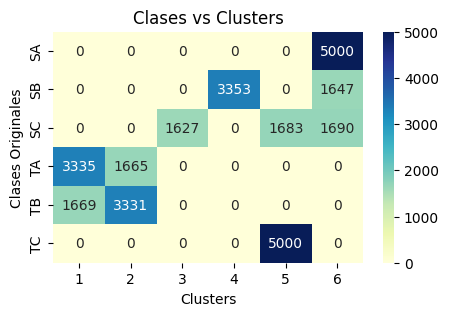

In [39]:
# Comparar clusters con las clases originales 
if 'Class' in df_con_clusters.columns:
    # Crear la tabla de contingencia
    tabla_contingencia = pd.crosstab(df_con_clusters['Class'], df_con_clusters['cluster'])

    # Visualización con heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
    plt.title('Clases vs Clusters')
    plt.xlabel('Clusters')
    plt.ylabel('Clases Originales')
    plt.show()
else:
    print("No se encontró la columna 'Class' en el dataset original.")

Aplicamos la tabla para cada método de clustering jerarquico que nos aporta la función `linkage()` y vemos cual nos ofrece mejores resultados. 

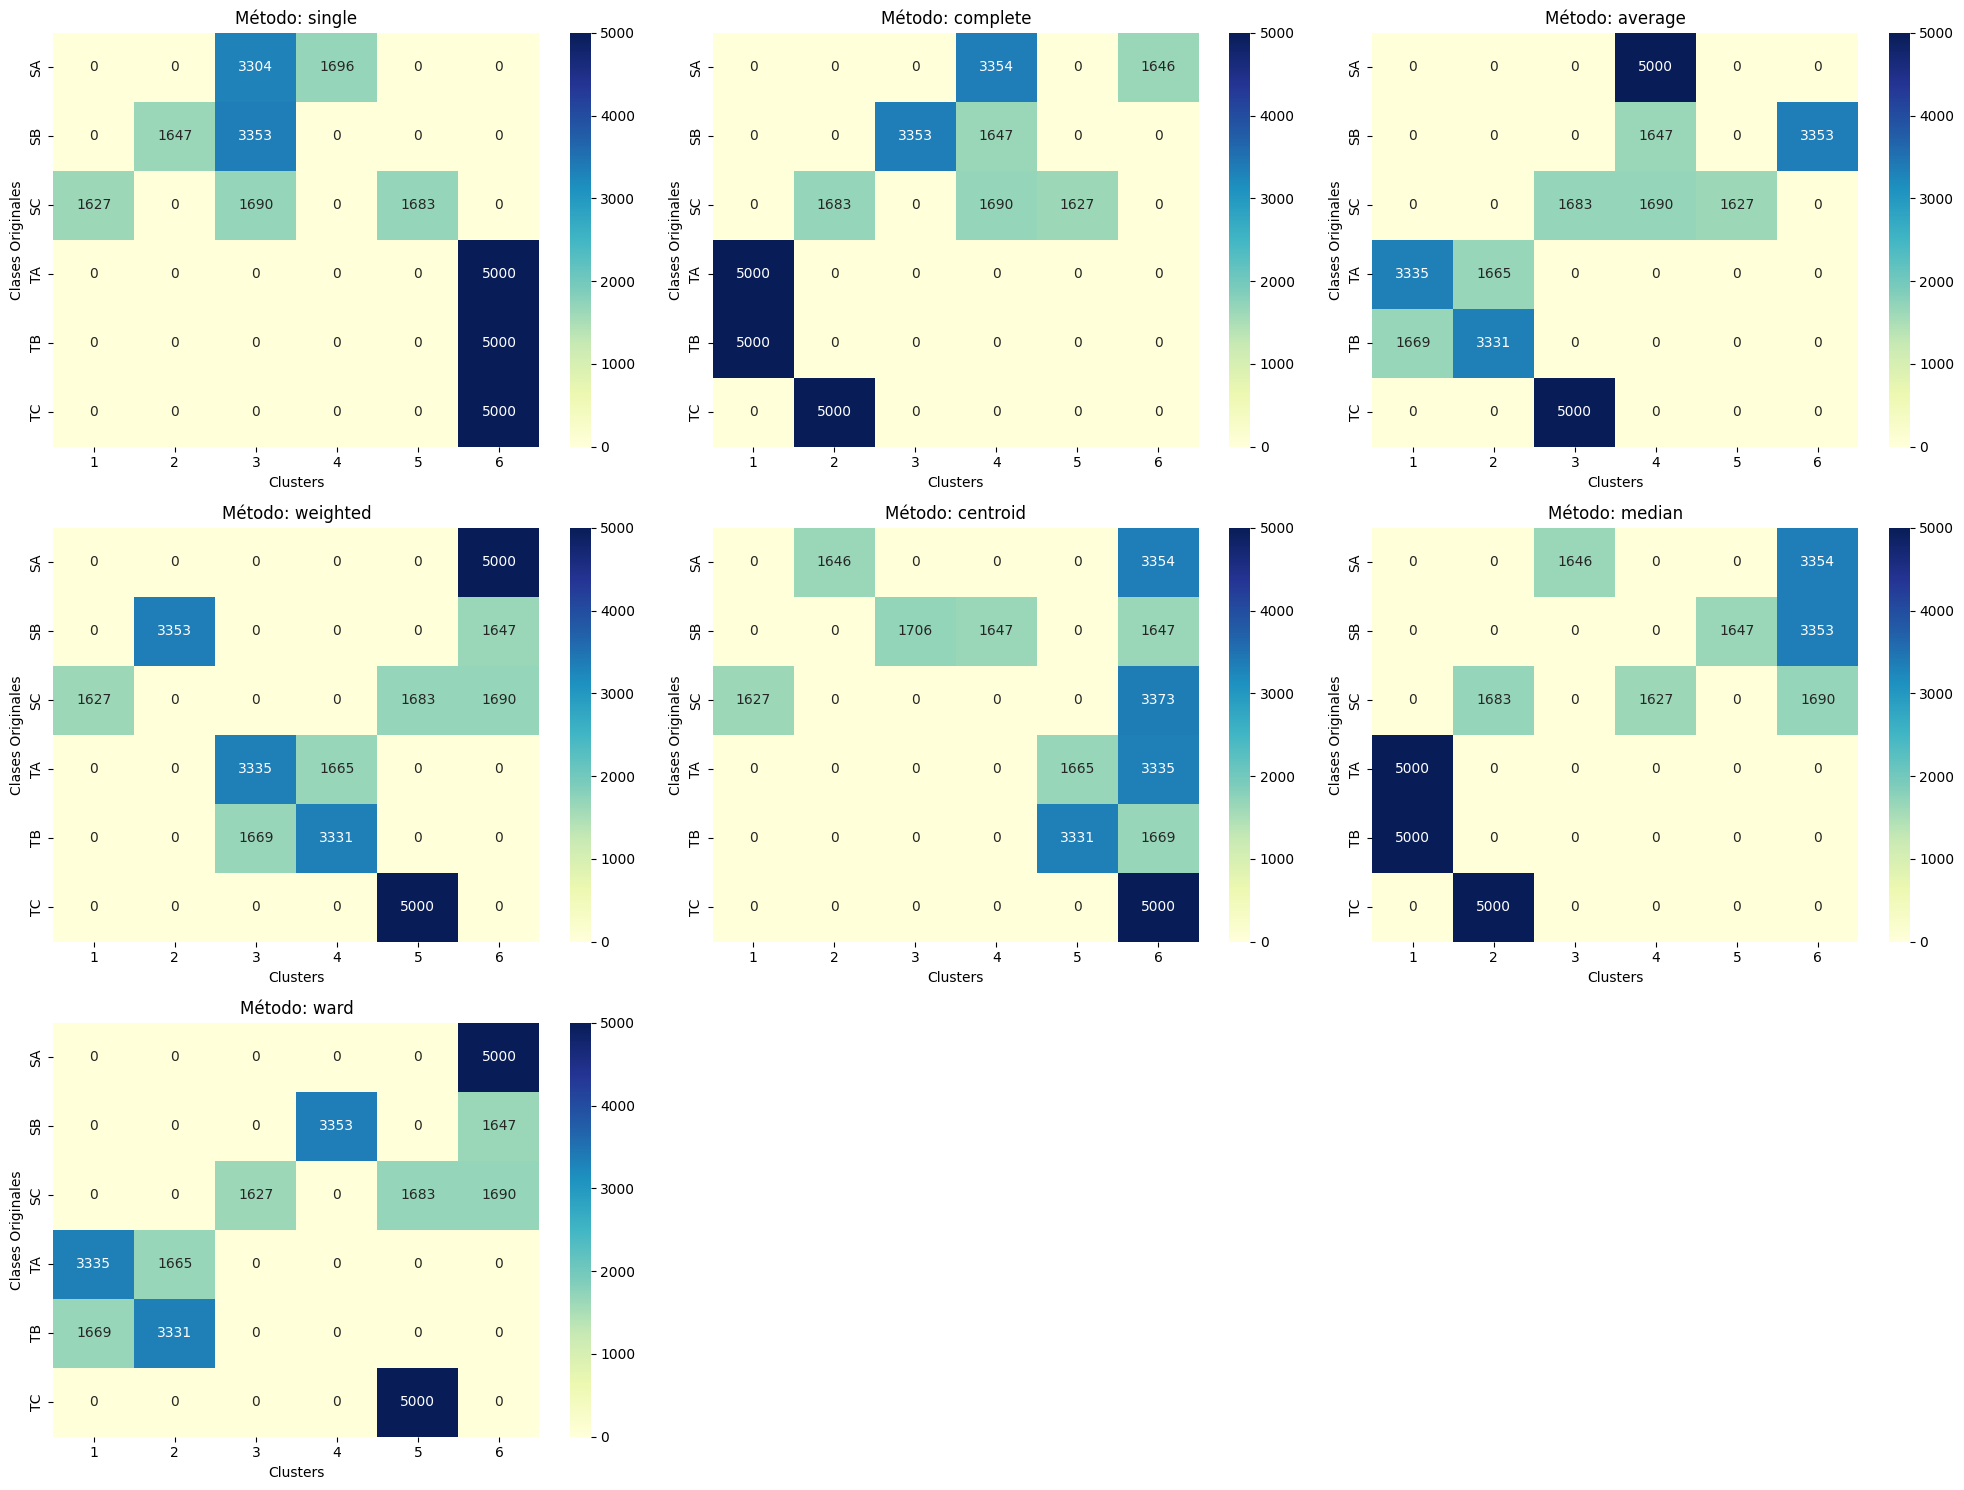

In [40]:
# Seleccionamos las columnas numéricas
X_numerico_cluster = X.select_dtypes(include=['number']).copy()

# Escalar los datos
df_scaled = StandardScaler().fit_transform(X_numerico_cluster)

# Lista de métodos para linkage
metodos = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

# Crear una copia del dataset original con las clases
df_con_clusters = raw_data.copy()

# Configurar el tamaño y la disposición de los subplots dinámicamente
n_metodos = len(metodos)
n_cols = 3
n_rows = math.ceil(n_metodos / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Iterar sobre cada método y crear el heatmap correspondiente
for i, metodo in enumerate(metodos):
    # Clustering jerárquico con el método actual
    Z = linkage(df_scaled, method=metodo)
    
    # Asignar clusters (en este caso, dividimos en 6 clusters; ajusta según necesidad)
    clusters = fcluster(Z, 6, criterion='maxclust')
    
    # Agregar los clusters al DataFrame
    df_con_clusters['cluster'] = clusters
    
    # Tabla de contingencia entre clusters y clase original
    if 'Class' in df_con_clusters.columns:
        tabla_contingencia = pd.crosstab(df_con_clusters['Class'], df_con_clusters['cluster'])
        
        # Heatmap en el subplot correspondiente
        sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu', cbar=True, ax=axes[i])
        axes[i].set_title(f'Método: {metodo}')
        axes[i].set_xlabel('Clusters')
        axes[i].set_ylabel('Clases Originales')
    else:
        print("No se encontró la columna 'Class' en el dataset original.")

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()


A la vista de estos resultados se puede ver como en cualquier tipo de clustering jerárquico, sea cual sea el método aplicado, vemos una fuerte tendencia a agrupar las clases que comienzan con la letra "S" por un lado y las que empiezan con la letra "T" por otro. Además hay otra tendencia que se puede observar en algunos casos y es un agrupamiento de las clases que terminan por la letra "C".

##### K-means

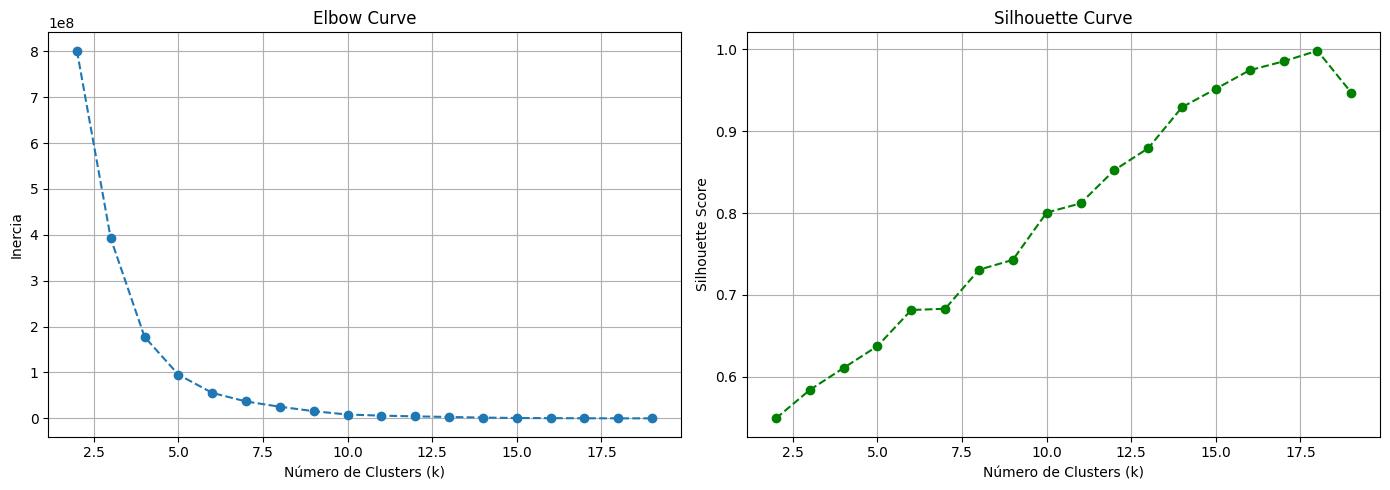

El mejor k basado en el Silhouette Score es: 18


In [41]:
# Definir el rango de valores de k
range_k = range(2, 20)

# Listas para almacenar las métricas
inertia = []
silhouette_scores = []

# Calcular el Elbow Curve y Silhouette Score para cada valor de k
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar el Elbow Curve
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)

# Graficar el Silhouette Curve
plt.subplot(1, 2, 2)
plt.plot(range_k, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Curve')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir el mejor k basado en el puntaje de Silhouette máximo
best_k = range_k[silhouette_scores.index(max(silhouette_scores))]
print("El mejor k basado en el Silhouette Score es:", best_k)

Se ha optado por seleccionar el valor de k en el algoritmo de K-Means utilizando el criterio de la curva de Silhouette. Este enfoque permite identificar el número óptimo de clusters que maximiza la cohesión y separación entre grupos, logrando así una mayor resolución en la clasificación. Al adoptar esta estrategia, se busca incrementar el nivel de detalle en la segmentación, lo que permite desglosar las plantas en una mayor cantidad de categorías o subgrupos, capturando mejor las posibles variaciones dentro de cada tipo de planta.

Al igual que el método anterior, exploraremos si el presente clasificador ha realizado lo propio en relación a las 6 categorías de plantass.

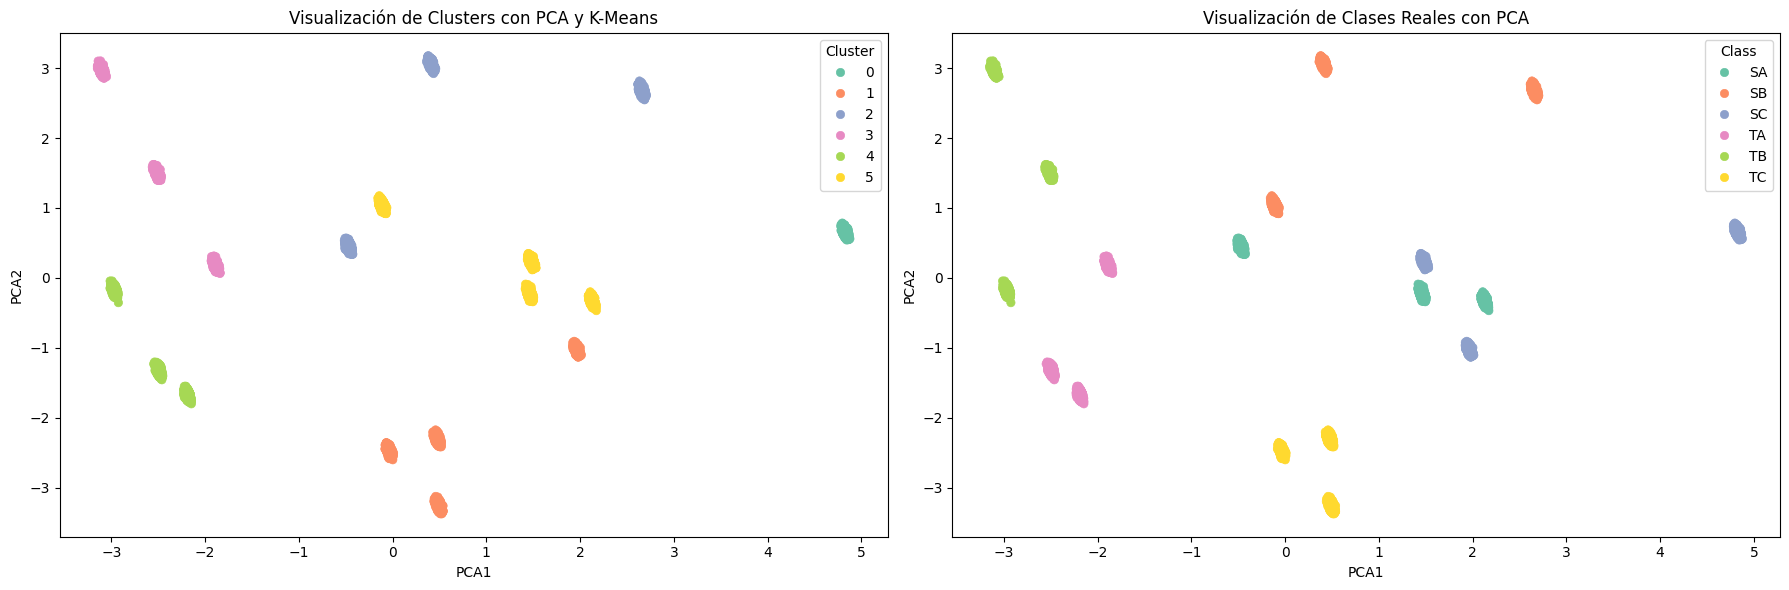

Varianza explicada por PCA1 y PCA2: [0.38246521 0.26410881]


In [42]:
#Copiamos el dataframe
raw_data2=raw_data.copy()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means con el mejor k encontrado (por ejemplo, obtenido anteriormente)
best_k = 6  # Reemplaza este valor con el mejor k encontrado a partir de las curvas
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

# Añadir los labels de los clusters al DataFrame original
raw_data2['Cluster'] = kmeans_final.labels_

# Aplicar PCA para reducir las dimensiones a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Añadir los resultados de PCA al DataFrame
raw_data2['PCA1'] = X_pca[:, 0]
raw_data2['PCA2'] = X_pca[:, 1]

# Crear una figura con dos gráficos en una fila
plt.figure(figsize=(18, 6))

# Primer gráfico: Visualización de clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=raw_data2, palette='Set2', edgecolor=None)
plt.title('Visualización de Clusters con PCA y K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Segundo gráfico: Visualización de las clases
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=raw_data2, palette='Set2', edgecolor=None)
plt.title('Visualización de Clases Reales con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()  # Ajustar el espaciado entre los gráficos
plt.show()

# Imprimir la varianza explicada por los componentes principales
print("Varianza explicada por PCA1 y PCA2:", pca.explained_variance_ratio_)


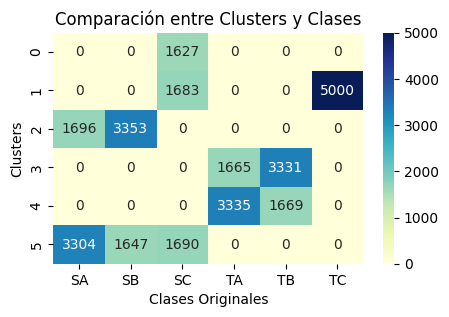

In [43]:
# Verificar que ambas columnas estén presentes en los DataFrames
if 'Cluster' in raw_data2.columns and 'Class' in raw_data.columns:
    # Crear la tabla de contingencia entre 'Cluster' y 'Class'
    comparison_table = pd.crosstab(raw_data2['Cluster'], raw_data['Class'])

    # Visualización de la tabla de contingencia con un heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(comparison_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
    plt.title('Comparación entre Clusters y Clases')
    plt.xlabel('Clases Originales')
    plt.ylabel('Clusters')
    plt.show()
else:
    print("No se encontraron las columnas 'Cluster' en raw_data2 o 'Class' en raw_data.")

Como podemos observar, el clasificador ha acertado en algunas clases pero ha presentado confusión en cuanto a otros, especialmente entre las clases "S" y "T". Esto nos puede indicar que hay una posible correspondencia en cuanto a propiedades de las plantas de esas categorías. Asimismo, parte de esta confusión se debe a la alta variabilidad que existe en los datos de cada clase real. Pondremos como ejemplo a la clase SA, la cual agrupa plantas que tienen suficiente variabilidad como para que el algoritmo las agrupe en subclusters. Abordaremos esto utilizando el k sugerido por el método de la silueta.

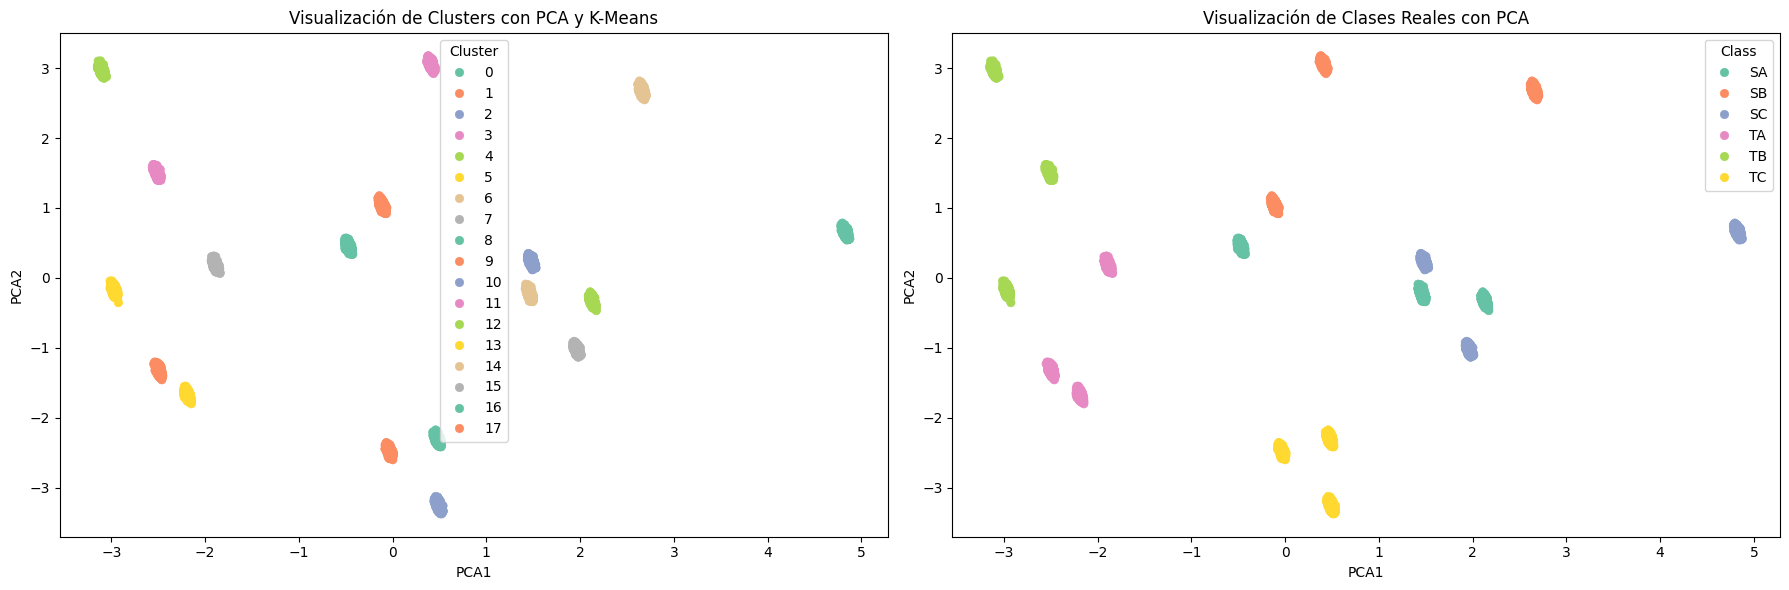

Varianza explicada por PCA1 y PCA2: [0.38246521 0.26410881]


In [44]:
#Copiamos el dataframe
raw_data2=raw_data.copy()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means con el mejor k encontrado (por ejemplo, obtenido anteriormente)
best_k = 18  # Reemplaza este valor con el mejor k encontrado a partir de las curvas
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_scaled)

# Añadir los labels de los clusters al DataFrame original
raw_data2['Cluster'] = kmeans_final.labels_

# Aplicar PCA para reducir las dimensiones a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Añadir los resultados de PCA al DataFrame
raw_data2['PCA1'] = X_pca[:, 0]
raw_data2['PCA2'] = X_pca[:, 1]

# Crear una figura con dos gráficos en una fila
plt.figure(figsize=(18, 6))

# Primer gráfico: Visualización de clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=raw_data2, palette='Set2', edgecolor=None)
plt.title('Visualización de Clusters con PCA y K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Segundo gráfico: Visualización de las clases
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=raw_data2, palette='Set2', edgecolor=None)
plt.title('Visualización de Clases Reales con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()  # Ajustar el espaciado entre los gráficos
plt.show()

# Imprimir la varianza explicada por los componentes principales
print("Varianza explicada por PCA1 y PCA2:", pca.explained_variance_ratio_)

Efectivamente, al utilizar el mejor K con el criterio de Sillhouette Curve, se encuentra una mejoría en la clasificación donde encontramos 18 grupos de plantas perfectamente aglomerados y suficientemente separados de otros clustes. Podría concluírse que cada cluster indica una especie de planta específica por la alta similitud de características.

## Selección de 2 Features:

Viendo los resultados obtenidos en los modelos supervisados hemos decidido reducir la dimensionalidad de nuestro dataset de una forma drástica, reduciendo todo a únicamente 2 variables, las cuales consideramos más importantes remitiendonos a la importancia de cada modelo como se hablo en la parte final de los modelos supervisados. 

Hemos escogido `Plant height rate (PHR)` y '`Average wet weight of the root (AWWR)` además de por tener gran importancia en la mayoría de modelos por estas fuertemente no relacionadas por lo que no afectará como problema a la multicolinealidad de los modelos.

### 2 Feature selection:

In [45]:
# Lista de las columnas optimas
columnas_seleccionadas = ['Plant height rate (PHR)', 'Average wet weight of the root (AWWR)', 'Class']
#columnas_seleccionadas = ['Plant height rate (PHR)', 'Average leaf area of the plant (ALAP)', 'Class']

# Filtramos el DataFrame para quedarnos solo con esas columnas
data_selected_2 = raw_data[columnas_seleccionadas]

X_2 = data_selected_2.drop('Class', axis=1)
y_2 = data_selected_2['Class']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)


### Logistic Regression con 2 características:

Exactitud del modelo: 100.00%

Reporte de Clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



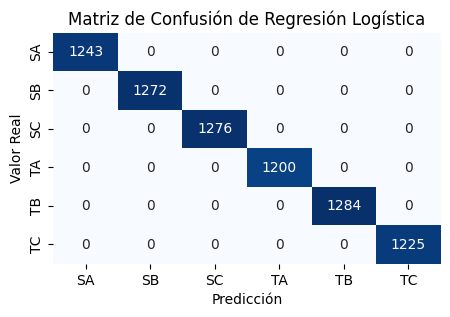

In [52]:
# Crear y entrenar el modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_2, y_train_2)

# Hacer predicciones en el conjunto de prueba
y_pred_2 = logistic_model.predict(X_test_2)

# Evaluar el modelo
accuracy = accuracy_score(y_test_2, y_pred_2)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
print("\nReporte de Clasificación:\n", classification_report(y_test_2, y_pred_2))

# Matriz de confusión
matriz_confusion_2 = confusion_matrix(y_test_2, y_pred_2)
class_labels = sorted(set(y_2))

# Visualizar la matriz de confusión
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión de Regresión Logística')
plt.show()

### SVM con 2 características

Exactitud del modelo: 100.00%

Reporte de Clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



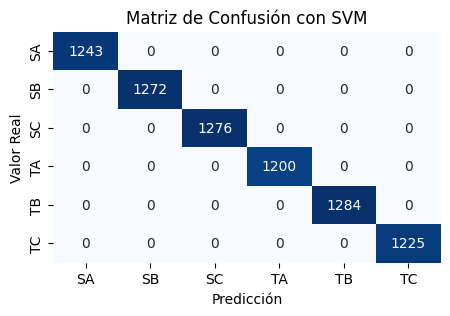

In [47]:

# Estandarizar las características (recomendado para SVM)
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_2, y_train_2)

# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_2)

# Evaluar el modelo
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
print("\nReporte de Clasificación:\n", classification_report(y_test_2, y_pred))

# Calcular la matriz de confusión
matriz_confusion_svm_2 = confusion_matrix(y_test_2, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_svm_2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con SVM')
plt.show()


### Random Forest con 2 características:

Exactitud del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



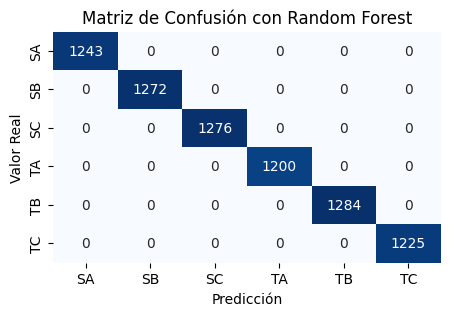

In [48]:
# Definir y entrenar el modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_2, y_train_2)

# Hacer predicciones y evaluar
y_pred = modelo_rf.predict(X_test_2)
accuracy = accuracy_score(y_test_2, y_pred)
reporte = classification_report(y_test_2, y_pred)

print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:\n", reporte)

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(y_test_2, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))  
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Random Forest')
plt.show()

### Decision Tree con 2 características:

Exactitud del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



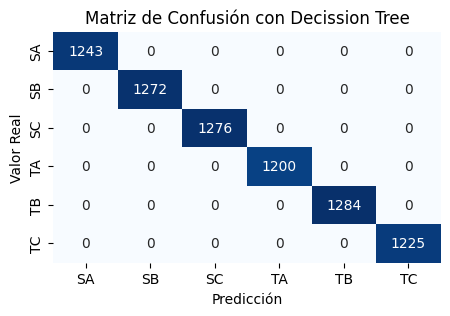

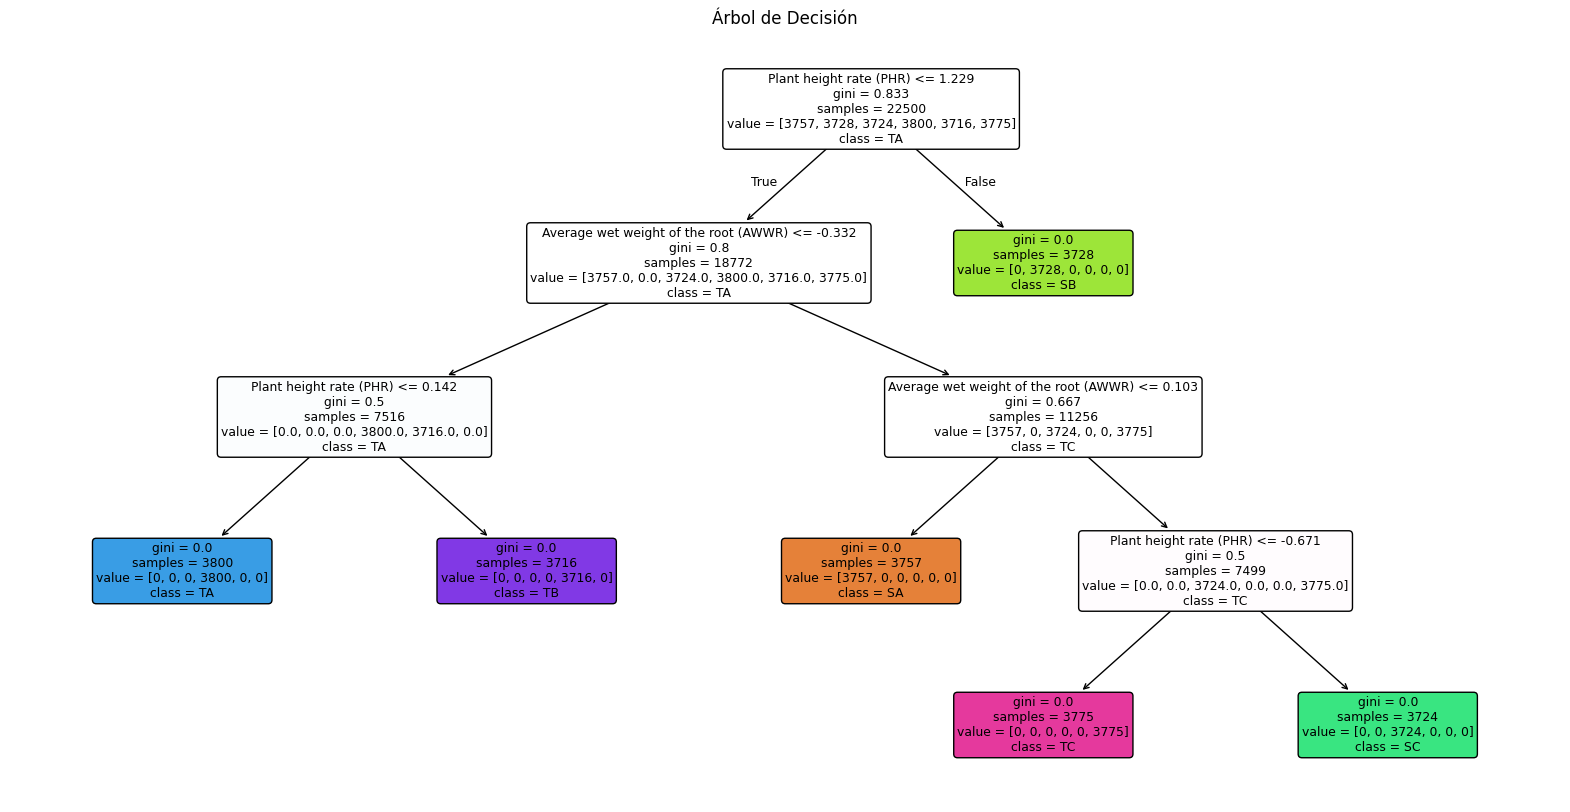

In [49]:
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train_2, y_train_2)

# Hacer predicciones y evaluar
y_pred = modelo_arbol.predict(X_test_2)
accuracy = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test_2, y_pred)

print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:\n", reporte)

# Obtener predicciones (interpretadas como valores enteros si las clases son numéricas)
y_pred = modelo_arbol.predict(X_test_2)

# Calcular la matriz de confusión
matriz_confusion_dt_2 = confusion_matrix(y_test_2, y_pred)

# Visualizar la matriz de confusión
class_labels = sorted(set(y))
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion_dt_2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Decission Tree')
plt.show()

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, filled=True, rounded=True, feature_names=list(X_2.columns), class_names=modelo_arbol.classes_)
plt.title("Árbol de Decisión")
plt.show()

### K-NN con 2 caracterísisticas:

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

          SA       1.00      1.00      1.00      1243
          SB       1.00      1.00      1.00      1272
          SC       1.00      1.00      1.00      1276
          TA       1.00      1.00      1.00      1200
          TB       1.00      1.00      1.00      1284
          TC       1.00      1.00      1.00      1225

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



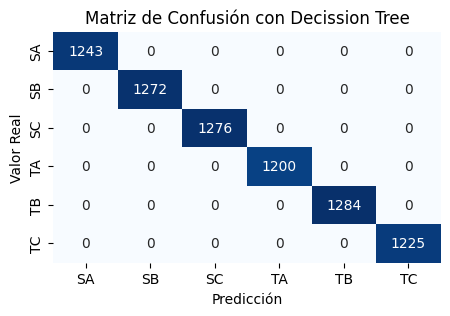

In [50]:
# Escalar las características para mejorar el rendimiento de KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_2)
X_test = scaler.transform(X_test_2)

# Definir el modelo KNN
knn = KNeighborsClassifier(n_neighbors=6)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred))


# Visualizar la matriz de confusión
matriz_confusion = confusion_matrix(y_test_2, y_pred)
class_labels = sorted(set(y))
plt.figure(figsize=(5, 3))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Decission Tree')
plt.show()



Los resultados con todos los modelos son muy buenos, teniendo en todos precisiones del 100%.

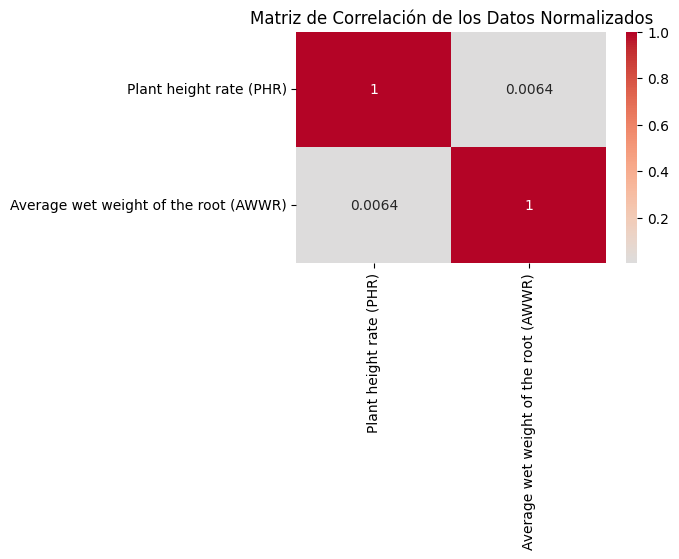

In [51]:
# Filtrar solo las columnas numéricas
numerical_data = data_selected_2.select_dtypes(include=['float64', 'int64'])

# Normalizar los datos (usando StandardScaler para estandarización)
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Crear un DataFrame de los datos normalizados, usando los mismos nombres de columnas
numerical_data_normalized = pd.DataFrame(numerical_data_normalized, columns=numerical_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_data_normalized.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de los Datos Normalizados")
plt.show()

Como se puede apreciar, las dos características escogidas además no están correlacionadas, por lo que no afectará en problemas de multicolinealidad a nuestros modelos como ya se comentó en la introdución de este apartado.

### Conclusiones

- La comparación entre los clusters de K-Means y las clases reales permitió identificar patrones ocultos en los datos, variabilidad dentro de cada clase y similitudes entre diferentes clases. Esto no solo ayudó a evaluar el rendimiento de K-Means, sino que también proporciona ideas sobre la estructura y naturaleza de las categorías de plantas en el dataset, lo que puede ser valioso para futuras investigaciones o aplicaciones en el análisis de plantas.
- A su vez la clusterización mediante clustering jerárquico ayudo a encontrar patrones en los datos también, probando incluso con diferentes métodos y obteniendo diferentes resultados, se podía ver cierta relación entre clases, la cual se puede abalar por su nomenclatura parecida.